<a href="https://colab.research.google.com/github/abekek/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/blob/main/notebooks/Jupyter_Paper_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rapid Fitting of Band-Excitation Piezoresponse Force Microscopy and Piezoelectric Hysteresis Loops Using Physics Constrained Unsupervised Neural Networks
Alibek T. Kaliyev<sup>1,2</sup>, 
Ryan Forelli<sup>5</sup>, 
Pedro Sales<sup>7</sup>, 
Shuyu Qin<sup>1</sup>, 
Yichen Guo<sup>3</sup>, 
Olugbodi (FJ) Oluwafolajinmi<sup>5</sup>,
Andrew Zheng<sup>6</sup>,
Seda Ogrenci Memik<sup>12</sup>,
Michael W. Mahoney<sup>11</sup>, 
Amir Gholami<sup>11</sup>, 
Rama K. Vasudevan<sup>9</sup>, 
Stephen Jesse<sup>9</sup>, 
Nhan Tran<sup>10</sup>, 
Philip Harris<sup>8</sup>, 
Martin Takáč<sup>4</sup>, 
Joshua C. Agar<sup>3*</sup>

___

<sup>1</sup> Department of Computer Science and Engineering, Lehigh University, Bethlehem, PA 18015, USA

<sup>2</sup> College of Business, Lehigh University, Bethlehem, PA 18015, USA

<sup>3</sup> Department of Materials Science and Engineering, Lehigh University, Bethlehem, PA 18015, USA

<sup>4</sup> Department of Industrial and Systems Engineering, Lehigh University, Bethlehem, PA 18015, USA

<sup>5</sup> Department of Electrical and Computer Engineering, Lehigh University, Bethlehem, PA 18015, USA

<sup>6</sup> Department of Mechanical Engineering & Mechanics, Lehigh University, Bethlehem, PA 18015, USA

<sup>7</sup> Department of Electrical Engineering and Computer Science, Massachusetts Institute of Technology (MIT), Cambridge, MA, USA

<sup>8</sup> Department of Physics, Massachusetts Institute of Technology (MIT), Cambridge, MA, USA

<sup>9</sup> Center for Nanophase Materials Sciences, Oak Ridge National Laboratory, Oak Ridge, TN 37830, USA

<sup>10</sup> Fermi National Accelerator Laboratory, Batavia, IL 60510, USA

<sup>11</sup> University of California, Berkeley, Berkeley, CA 94720, USA

<sup>12</sup> Department of Electrical and Computer Engineering, Northwestern University, Evanston, IL 60208, USA

*joshua.agar@lehigh.edu

Keywords:  

# Abstract (text)

For nearly a decade, band-excitation piezoresponse force-based switching spectroscopy (BEPS) has been used to characterize ferroelectric switching and dynamic electromechanical responses of materials with nanoscale resolution. One of the key outputs of this technique is hyperspectral images of piezoelectric hysteresis loops, wherein there are one or more hysteresis loops at every pixel position. The challenge and dedication required to properly analyze data from these experiments have throttled the impact and widespread use of BEPS. To simplify the extraction of information from these datasets, a common approach involves fitting the piezoelectric hysteresis loops to an empirical function to parameterize the loops. This technique has several shortcomings:

It is computationally intensive, requiring more than 24 hours to process a single experiment on a single workstation with parallel processing.
It is highly dependent on prior estimates, which are difficult to compute to ensure optimization close to the global minimum.
It is unable to accommodate some of the complex features observed in piezoelectric hysteresis loops.

In an alternative approach, researchers have applied machine learning algorithms including principal component analysis, clustering algorithms, and non-negative matrix factorization to statistically address this problem. These algorithms are limited by their linear constraints, computational efficiency, and interpretability.

Our goal is to develop a fully unsupervised approach based on deep recurrent neural networks in the form of an autoencoder. This autoencoder will be able to learn a sparse and thus interpretable latent space of piezoelectric hysteresis loops, revealing detailed physical insight that will allude to results from other analysis techniques. This approach, however, is generally not applied due to the computational resources required for training. Here, we address this problem by developing generalized pre-trained models which can conduct feature extraction from piezoelectric hysteresis loops with minimal or potentially no training. We will achieve this by feeding a large database of noisy real piezoelectric hysteresis loops into the unsupervised model, with Residual Network architecture and Attention layers (widely used in Natural Language Processing), which will reproduce loops using the empirical function. After the training, we will extract the intermediate layer responsible for predicting parameters of loops. We will then benchmark the performance by validating the model on example open experimental datasets. We will determine how to best fine-tune these models using minimal computational resources to improve their efficacy on experimental data. By developing pre-trained models, we can significantly decrease the computational complexity of using these techniques.

Using this approach, it might be possible to deploy these methods for real-time analysis of BEPS, thus enabling experimentalists to improve their experimental efficiency and extract more information from these experiments. While our work focuses on developing models and benchmarking their efficacy in BEPS, this methodology could be adapted to other spectroscopic imaging techniques.

# Introduction (text)

## Initialization Code (code)

### Mounting Google Drive (code)

In [1]:
# if running on collaboratory set = True
collaboratory = True

if collaboratory:
    from google.colab import drive
    drive.mount('/content/drive')
else: 
    print('Running on local systems, if running on collaboratory please change above')

Mounted at /content/drive


In [2]:
# changes directory to your main google drive folder
%cd drive/My\ Drive

/content/drive/My Drive


In [3]:
# Checks if the directory exists
import os
if os.path.exists("./Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting"):
    pass
else:
    !git clone https://github.com/abekek/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting.git

In [4]:
# moves to the right directory
%cd Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting

/content/drive/My Drive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting


In [5]:
# checks if the directory is up to date
!git pull

Updating 52b267f..d622bd2
error: Your local changes to the following files would be overwritten by merge:
	Trained Models/SHO Fitting/model_AdaHessian.pt
Please commit your changes or stash them before you merge.
error: The following untracked working tree files would be overwritten by merge:
	Assets/Movies/amplitude_movie.mp4
	Assets/Movies/phase_movie.mp4
	Assets/Movies/q_factor_movie.mp4
	Assets/Movies/resonance_movie.mp4
Please move or remove them before you merge.
Aborting


### Installing Packages (code)

In [6]:
# Installs all of the requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.6 MB/s 
     |████████████████████████████████| 121 kB 7.7 MB/s 
     |████████████████████████████████| 147 kB 45.0 MB/s 
     |████████████████████████████████| 178 kB 89.9 MB/s 
     |████████████████████████████████| 242 kB 91.0 MB/s 
     |████████████████████████████████| 14.8 MB 82.2 MB/s 
     |████████████████████████████████| 2.2 MB 48.6 MB/s 
     |████████████████████████████████| 97 kB 7.8 MB/s 
     |████████████████████████████████| 41 kB 339 kB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 279 kB 78.1 MB/s 
     |████████████████████████████████| 61 kB 9.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 136 kB 83.9 MB/s 
     |█████████████████████████

In [7]:
# installing PyTorch's Nightly version
!pip install --pre torch torchvision -f https://download.pytorch.org/whl/nightly/cu101/torch_nightly.html -U

!pip install pycroscopy==0.60.7

if os.path.exists("./BGlib"):
    pass
else:
    !git clone https://github.com/pycroscopy/BGlib.git
    %cd BGlib/
    !git tag -l
    !git checkout 0.0.3
    !git branch -D master
    !git checkout -b master
    %cd ..

# downgrading the h5py version
!pip install 'h5py==2.10.0' --force-reinstal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/nightly/cu101/torch_nightly.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycroscopy-0.60.7-py2.py3-none-any.whl (354 kB)
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████████████| 51 kB 263 kB/s 
  Using cached numpy_groupies-0.9.7.tar.gz (22 kB)
     |████████████████████████████████| 793 kB 24.1 MB/s 
  Using cached pyUSID-0.0.10-py2.py3-none-any.whl (66 kB)
     |████████████████████████████████| 381 kB 52.4 MB/s 
     |████████████████████████████████| 481 kB 43.1 MB/s 
     |████████████████████████████████| 837 kB 15.2 MB/s 
     |████████████████████████████████| 1.1 MB 43.2 MB/s 
     |████████████████████████████████| 140 kB 81.4 MB/s 
     |████████████████████████████████| 596 kB 73.4 MB/s 
  Created wheel for numpy-gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
     |████████████████████████████████| 15.7 MB 4.0 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipy

### Importing Packages (code)

In [8]:
import gdown
import multiprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numba import jit
import random
import time
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim.lr_scheduler as lr_scheduler
import argparse
import seaborn as sns
from scipy.signal import resample
from scipy import fftpack
from scipy import io
from scipy import special
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.layers import (Attention, Dense, Conv1D, Convolution2D, 
                                     GRU, LSTM, Bidirectional, TimeDistributed,
                                     Dropout, Flatten, LayerNormalization, 
                                     RepeatVector, Reshape, MaxPooling1D, 
                                     UpSampling1D, BatchNormalization, Activation)
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from multiprocessing import Pool, Process
import multiprocessing as mp
from moviepy.editor import *
import glob
from sklearn.metrics import mean_squared_error
import gc
import sidpy
from BGlib.BGlib import be as belib
 
# set up notebook to show plots within the notebook
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.patches import ConnectionPatch

# Import necessary libraries:
# General utilities:
import sys
import os
import gc

# Computation:
import numpy as np
import h5py
import pandas as pd

# Visualization:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image
from IPython.display import clear_output
from mpl_toolkits.axes_grid1 import ImageGrid

# Finally, pycroscopy itself
sys.path.append('../../../')
import pyUSID as usid
from codes.util.preprocessing_global_standard_scaler import global_standard_scaler
from sidpy.hdf.hdf_utils import write_simple_attrs, get_attr
from pyUSID.io.hdf_utils import create_results_group, write_main_dataset, write_reduced_anc_dsets, create_empty_dataset, reshape_to_n_dims, get_auxiliary_datasets
from pyUSID.io.usi_data import USIDataset
from pyUSID.io import Dimension

from codes.util.file import print_tree
from codes.util.core import SHO_fit_func_torch, loop_fitting_function, loop_fitting_function_tf, computeDotProducts, normOfVar, fit_loop_function, computeTime, conventional_fit_loop_function
from codes.viz.plot import plot_best_worst_SHO, make_movie, plot_best_worst_loops, plot_reconstruction_comparison_SHO, plot_reconstruction_comparison_loops
from codes.util.postprocessing import transform_params, convert_real_imag
from codes.util.preprocessing_global_scaler import global_scaler
from codes.processing.filters import range_filter, clean_interpolate, interpolate_missing_points
from codes.algorithm.TRPCGOptimizerv2 import TRPCGOptimizerv2
from codes.algorithm.AdaHessian import AdaHessian

import numpy.lib.recfunctions as rfn

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2211840/45929032 bytes (4.8%)5464064/45929032 bytes (11.9%)8380416/45929032 bytes (18.2%)11788288/45929032 bytes (25.7%)15409152/45929032 bytes (33.5%)18620416/45929032 bytes (40.5%)22192128/45929032 bytes (48.3%)25640960/45929032 bytes (55.8%)29089792/45929032 bytes (63.3%)32931840/45929032 bytes (71.7%)36806656/45929032 bytes (80.1%)40550400/45929032 bytes (88.3%)

### Setting Defaults (code)

In [9]:
# shows the number of CPU cores
multiprocessing.cpu_count()

4

In [10]:
# shows the GPU that is available and the resources
!nvidia-smi

Tue Jun 14 19:02:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
# fixes the random seed for reproducible training
torch.set_default_dtype(torch.float64)
torch.manual_seed(42)
np.random.seed(42)

In [13]:
# resetting default seaborn style
sns.reset_orig()

# setting default plotting params
plt.rcParams['image.cmap'] = 'magma'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### Loading data for SHO fitting (code)

In [14]:
#TODO place this file on Zenodo before publication 
# downloads the original experiment file
gdown.download('https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2', 'data_file.h5', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2
To: /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/data_file.h5
100%|██████████| 1.80G/1.80G [00:27<00:00, 65.9MB/s]


'data_file.h5'

In [15]:
# Opens the translated file
h5_f = h5py.File('./data_file.h5', 'r+')

#Inspects the h5 file
usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS

In [16]:
print('Datasets and datagroups within the file:\n------------------------------------')
print_tree(h5_f.file)
 
print('\nThe main dataset:\n------------------------------------')
print(h5_f)
print('\nThe ancillary datasets:\n------------------------------------')
print(h5_f.file['/Measurement_000/Channel_000/Position_Indices'])
print(h5_f.file['/Measurement_000/Channel_000/Position_Values'])
print(h5_f.file['/Measurement_000/Channel_000/Spectroscopic_Indices'])
print(h5_f.file['/Measurement_000/Channel_000/Spectroscopic_Values'])

print('\nMetadata or attributes in a datagroup\n------------------------------------')
for key in h5_f.file['/Measurement_000'].attrs:
    print('{} : {}'.format(key, h5_f.file['/Measurement_000'].attrs[key]))

Datasets and datagroups within the file:
------------------------------------
/
/Measurement_000
/Measurement_000/Channel_000
/Measurement_000/Channel_000/Bin_FFT
/Measurement_000/Channel_000/Bin_Frequencies
/Measurement_000/Channel_000/Bin_Indices
/Measurement_000/Channel_000/Bin_Step
/Measurement_000/Channel_000/Bin_Wfm_Type
/Measurement_000/Channel_000/Excitation_Waveform
/Measurement_000/Channel_000/Noise_Floor
/Measurement_000/Channel_000/Position_Indices
/Measurement_000/Channel_000/Position_Values
/Measurement_000/Channel_000/Raw_Data
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Indices
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Values
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/completed_fit_positions
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/completed_guess_positions

In [17]:
# This sets the cores for computing the conventional fits.
# Data included has been fit with this method. 

# Maximum memory to use, in Mbs. Default = 1024
max_mem = 1024 * 8 

# Number of logical cores to use in fitting.  None uses all but 2 available cores.
max_cores = None 

# Note that if you set this to True, visualization is unlikely to work!
results_to_new_file = False

# Part I. SHO Fitter

## Extracting Constants

In [18]:
# number of samples per SHO fit
num_bins = h5_f['Measurement_000'].attrs['num_bins'] 

# number of pixels in the image
num_pix = h5_f['Measurement_000'].attrs['num_pix'] 

# number of pixels in x and y dimensions
num_pix_1d = int(np.sqrt(num_pix)) 

# number of DC voltage steps 
voltage_steps = h5_f['Measurement_000'].attrs['num_udvs_steps']

# sampling rate
sampling_rate = h5_f['Measurement_000'].attrs['IO_rate_[Hz]']

# BE bandwidth
be_bandwidth = h5_f['Measurement_000'].attrs['BE_band_width_[Hz]']

# BE center frequency
be_center_frequency = h5_f['Measurement_000'].attrs['BE_center_frequency_[Hz]']

# Frequency Vector in Hz
frequency_bin = h5_f['Measurement_000']['Channel_000']['Bin_Frequencies'][:]

# Resampled frequency vector
wvec_freq = resample(frequency_bin, 80)

In [19]:
# get raw data (real and imaginary combined)
raw_data = h5_f['Measurement_000']['Channel_000']['Raw_Data']
raw_data_resampled = resample(np.array(raw_data).reshape(-1 , 165), 80, axis=1)

In [20]:
# extracting the excitation waveform
be_waveform = h5_f['Measurement_000']['Channel_000']['Excitation_Waveform']

# extracting spectroscopic values
spectroscopic_values = h5_f['Measurement_000']['Channel_000']['Spectroscopic_Values']

## Conventional (LSQF) fitting time

**Note**: this code takes around 15 minutes to execute

In [21]:
start_time_lsqf = time.time()

input_file_path = 'data_file.h5'

(data_dir, filename) = os.path.split(input_file_path)

if input_file_path.endswith('.h5'):
    # No translation here
    h5_path = input_file_path
    force = True # Set this to true to force patching of the datafile.
    tl = belib.translators.LabViewH5Patcher()
    tl.translate(h5_path, force_patch=force)
else:
    # Set the data to be translated
    data_path = input_file_path

    (junk, base_name) = os.path.split(data_dir)

    # Check if the data is in the new or old format.  Initialize the correct translator for the format.
    if base_name == 'newdataformat':
        (junk, base_name) = os.path.split(junk)
        translator = px.io.translators.BEPSndfTranslator(max_mem_mb=max_mem)
    else:
        translator = px.io.translators.BEodfTranslator(max_mem_mb=max_mem)
    if base_name.endswith('_d'):
        base_name = base_name[:-2]
    # Translate the data
    h5_path = translator.translate(data_path, show_plots=True, save_plots=False)

folder_path, h5_raw_file_name = os.path.split(h5_path)
h5_file = h5py.File(h5_path, 'r+')
print('Working on:\n' + h5_path)

h5_main = usid.hdf_utils.find_dataset(h5_file, 'Raw_Data')[0]

h5_pos_inds = h5_main.h5_pos_inds
pos_dims = h5_main.pos_dim_sizes
pos_labels = h5_main.pos_dim_labels
print(pos_labels, pos_dims)

h5_meas_grp = h5_main.parent.parent

parm_dict = sidpy.hdf_utils.get_attributes(h5_meas_grp)

expt_type = usid.hdf_utils.get_attr(h5_file, 'data_type')

is_ckpfm = expt_type == 'cKPFMData'
if is_ckpfm:
    num_write_steps = parm_dict['VS_num_DC_write_steps']
    num_read_steps = parm_dict['VS_num_read_steps']
    num_fields = 2
    
if expt_type != 'BELineData':
    vs_mode = usid.hdf_utils.get_attr(h5_meas_grp, 'VS_mode')
    try:
        field_mode = usid.hdf_utils.get_attr(h5_meas_grp, 'VS_measure_in_field_loops')
    except KeyError:
        print('field mode could not be found. Setting to default value')
        field_mode = 'out-of-field'
    try:
        vs_cycle_frac = usid.hdf_utils.get_attr(h5_meas_grp, 'VS_cycle_fraction')
    except KeyError:
        print('VS cycle fraction could not be found. Setting to default value')
        vs_cycle_frac = 'full'

sho_fit_points = 5  # The number of data points at each step to use when fitting
sho_override = False  # Force recompute if True

max_cores = 10

h5_sho_targ_grp = None
if True:
    h5_sho_file_path = os.path.join(folder_path, 
                                h5_raw_file_name.replace('.h5', '_sho_fit.h5'))
    print('\n\nSHO Fits will be written to:\n' + h5_sho_file_path + '\n\n')
    f_open_mode = 'w'
    if os.path.exists(h5_sho_file_path):
        f_open_mode = 'r+'
    h5_sho_file = h5py.File(h5_sho_file_path, mode=f_open_mode)
    h5_sho_targ_grp = h5_sho_file
    
sho_fitter = belib.analysis.BESHOfitter(h5_main, cores=max_cores, verbose=False, h5_target_group=h5_sho_targ_grp)
sho_fitter.set_up_guess(guess_func=belib.analysis.be_sho_fitter.SHOGuessFunc.complex_gaussian,
                        num_points=sho_fit_points)
h5_sho_guess = sho_fitter.do_guess(override=sho_override)
sho_fitter.set_up_fit()
h5_sho_fit = sho_fitter.do_fit(override=sho_override)
parms_dict = parms_dict = sidpy.hdf_utils.get_attributes(h5_main.parent.parent)

print(f'LSQF method took {time.time() - start_time_lsqf} seconds to compute parameters')

Working on:
data_file.h5
['Y', 'X'] [60, 60]


SHO Fits will be written to:
data_file_sho_fit.h5


Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file
Group: <HDF5 group "/Raw_Data-SHO_Fit_000" (5 members)> had neither the status HDF5 dataset or the legacy attribute: "last_pixel".

Note: SHO_Fit has already been performed PARTIALLY with the same parameters. compute() will resuming computation in the last group below. To choose a different group call use_patial_computation()Set override to True to force fresh computation or resume from a data group besides the last in the list.

[<HDF5 group "/Raw_Data-SHO_Fit_001" (8 members)>]
Group: <HDF5 group "/Raw_Data-SHO_Fit_000" (5 members)> had neither the status HDF5 dataset or the legacy attribute: "last_pixel".

Note: SHO_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to

## Conversion of Real/Imaginary to Magnitude/Phase Representation

In [22]:
# conversion of raw data (both resampled and full)
magnitude_graph_initial_full, phase_graph_initial_full = convert_real_imag(raw_data)
magnitude_graph_initial, phase_graph_initial = convert_real_imag(raw_data_resampled)

## Graphs

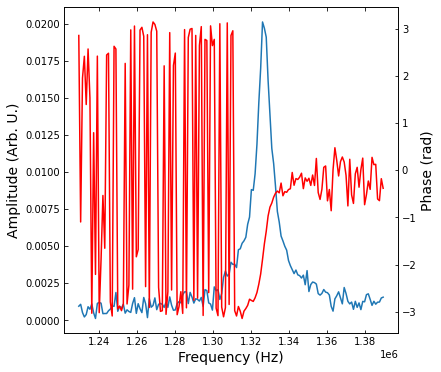

In [23]:
pixel = np.random.randint(0, raw_data.shape[0])
timestep = np.random.randint(0, raw_data.shape[1]) // num_bins
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax1.plot(frequency_bin, magnitude_graph_initial_full.reshape(num_pix, -1, num_bins)[pixel, timestep])
ax1.set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)');
ax2 = ax1.twinx()
ax2.plot(frequency_bin, phase_graph_initial_full.reshape(num_pix, -1, num_bins)[pixel, timestep], 'r')
ax2.set(xlabel='Frequency (Hz)', ylabel='Phase (rad)');

Number of time steps: 4096.0


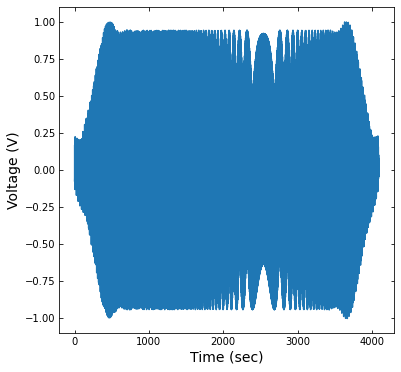

In [24]:
fig, axs = plt.subplots(figsize=(6, 6))
be_timesteps = len(be_waveform)/4
print('Number of time steps: ' + str(be_timesteps))
axs.plot(be_waveform[:np.int(be_timesteps)])
axs.set(xlabel='Time (sec)', ylabel='Voltage (V)')
# axs.set_title('BE Waveform')

plt.savefig("Assets/Figures/be_waveform_raw.png", bbox_inches='tight', pad_inches=1)
plt.savefig("Assets/Figures/be_waveform_raw.svg", bbox_inches='tight', pad_inches=1)

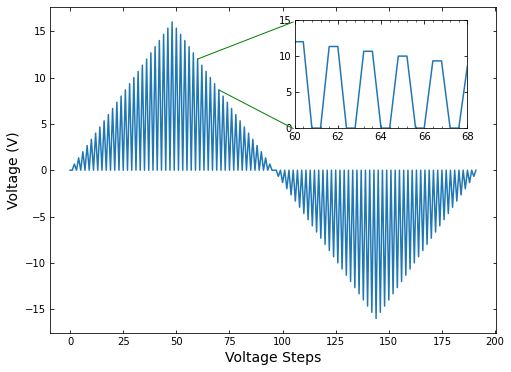

In [25]:
fig, axs = plt.subplots(figsize=(8, 6))
hysteresis_waveform = spectroscopic_values[1, ::165][192:] * spectroscopic_values[2, ::165][192:]
x_start = 120
x_end = 140

axs.plot(hysteresis_waveform)
ax_new = fig.add_axes([0.55, 0.6, 0.3, 0.25])
ax_new.plot(np.repeat(hysteresis_waveform, 2))
ax_new.set_xlim(x_start, x_end)
ax_new.set_ylim(0, 15)
ax_new.set_xticks(np.arange(x_start, x_end), 2)
ax_new.set_xticklabels([60, 62, 64, 66, 68, 70]) 
fig.add_artist(ConnectionPatch(xyA=(x_start//2, hysteresis_waveform[x_start//2]), coordsA=axs.transData, xyB=(105, 16), coordsB=axs.transData, color='green'))
fig.add_artist(ConnectionPatch(xyA=(x_end//2, hysteresis_waveform[x_end//2]), coordsA=axs.transData, xyB=(105, 4.5), coordsB=axs.transData, color='green'))
axs.set_xlabel('Voltage Steps')
axs.set_ylabel('Voltage (V)')

plt.savefig('Assets/Figures/hysteresis_waveform_stacked_0.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/hysteresis_waveform_stacked_0.svg', bbox_inches='tight', pad_inches=1)

### FFT

In [26]:
resonance_graph = np.fft.fft(be_waveform[:np.int(be_timesteps)])
fftfreq = fftpack.fftfreq(np.int(be_timesteps)) * sampling_rate

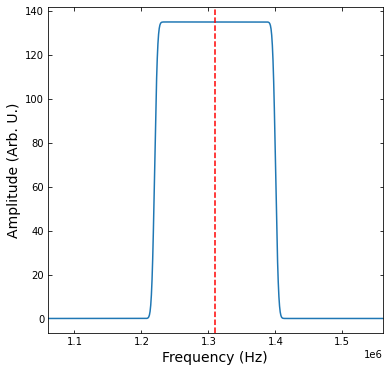

In [27]:
fig, axs = plt.subplots(figsize=(6, 6))

axs.plot(fftfreq[:np.int(be_timesteps)//2], np.abs(resonance_graph[:np.int(be_timesteps)//2]))
axs.axvline(x=be_center_frequency, ymax=np.max(resonance_graph[:np.int(be_timesteps)//2]), linestyle='--', color='r')
axs.set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)')
# axs.set_title('Resonance')
plt.xlim(be_center_frequency - be_bandwidth - be_bandwidth * 0.25, be_center_frequency + be_bandwidth + be_bandwidth * 0.25);

plt.savefig('Assets/Figures/resonance.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/resonance.svg', bbox_inches='tight', pad_inches=1)

## Resampling the data

In [28]:
# get real and imaginary components from raw data
real = np.real(h5_f['Measurement_000']['Channel_000']['Raw_Data'])
imag = np.imag(h5_f['Measurement_000']['Channel_000']['Raw_Data'])

# resample both real and imaginary components 
real_resample = resample(real.reshape(num_pix, -1, num_bins), 80, axis=2)
imag_resample = resample(imag.reshape(num_pix, -1, num_bins), 80, axis=2)

## Visualizing Input Data

### Comparison of original and resampled data

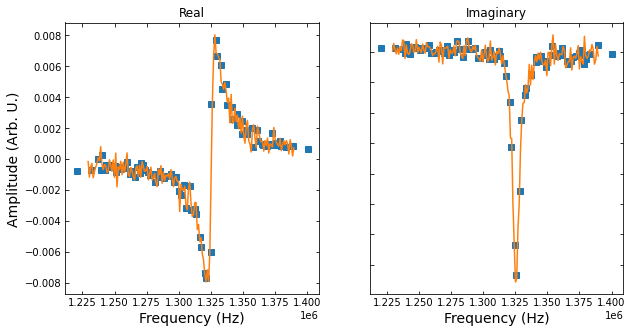

In [29]:
# generates random pixel position and timestep
pixel = np.random.randint(0, real.shape[0])
timestep = np.random.randint(0, real.shape[1]) // num_bins

# plot real and imaginary components of resampled data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].set_title('Real')
axs[0].plot(wvec_freq, 
            real_resample[pixel, timestep],'s')
axs[0].plot(frequency_bin, 
            real[pixel].reshape(-1, num_bins)[timestep])

axs[1].set_title('Imaginary')
axs[1].plot(wvec_freq, 
            imag_resample[pixel, timestep],'s')

axs[1].plot(frequency_bin,
            imag[pixel].reshape(-1, num_bins)[timestep])

for ax in axs.flat:
    ax.set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)')

for ax in axs.flat:
    ax.label_outer()

In [30]:
# FOR NEURAL NETWORK

# pixel = np.random.randint(0, real.shape[0])
# timestep = np.random.randint(0, real.shape[1]) // num_bins
# fig, axs = plt.subplots(figsize=(6,6))
# axs.set_title('Real and Imaginary')
# axs.plot(wvec_freq, 
#             real_resample[pixel, timestep],'s')

# axs.plot(frequency_bin, 
#             real[pixel].reshape(-1, num_bins)[timestep], label='Real')

# axs.plot(wvec_freq, 
#             imag_resample[pixel, timestep],'s')

# axs.plot(frequency_bin,
#             imag[pixel].reshape(-1, num_bins)[timestep], label='Imaginary')

# axs.set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)')

# fig.legend(bbox_to_anchor=(1.16, 0.93), loc='upper right', borderaxespad=0.)
# fig.tight_layout()

# plt.savefig('Assets/Figures/SHO_input_test.png', pad_inches=1)

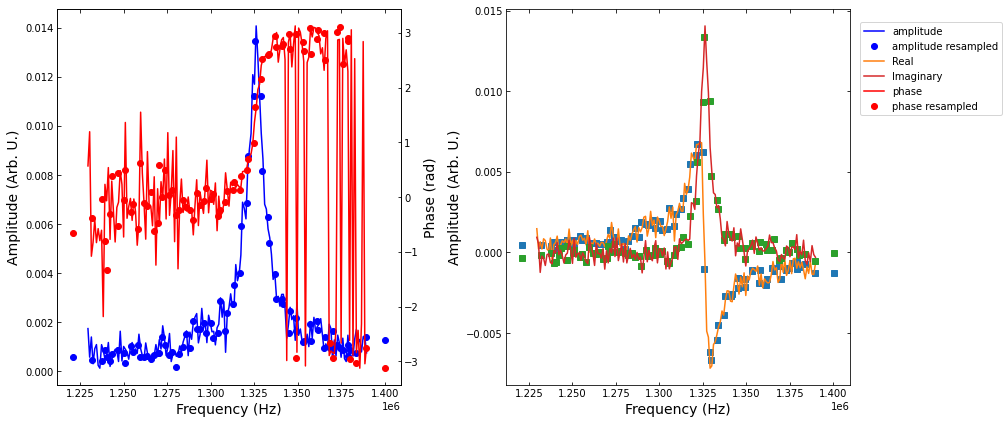

In [31]:
# generates random pixel position and timestep
pixel = np.random.randint(0, real.shape[0])
timestep = np.random.randint(0, real.shape[1]) // num_bins

# plot real and imaginary components of resampled data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# axs[0].set_title('Magnitude/Phase representation')
axs[0].plot(frequency_bin, magnitude_graph_initial_full[pixel].reshape(-1, num_bins)[timestep], label='amplitude', color='b')
axs[0].plot(wvec_freq, magnitude_graph_initial.reshape(num_pix, voltage_steps, -1)[pixel, timestep], 'o', label='amplitude resampled', color='b')
axs[0].set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)');
ax2 = axs[0].twinx()
ax2.plot(frequency_bin, phase_graph_initial_full[pixel].reshape(-1, num_bins)[timestep], label='phase', color='r')
ax2.plot(wvec_freq, phase_graph_initial.reshape(num_pix, voltage_steps, -1)[pixel, timestep], 'o', label='phase resampled', color='r')
ax2.set(xlabel='Frequency (Hz)', ylabel='Phase (rad)');

# axs[1].set_title('Real and Imaginary')
axs[1].plot(wvec_freq, 
            real_resample[pixel, timestep],'s')

axs[1].plot(frequency_bin, 
            real[pixel].reshape(-1, num_bins)[timestep], label='Real')

axs[1].plot(wvec_freq, 
            imag_resample[pixel, timestep],'s')

axs[1].plot(frequency_bin,
            imag[pixel].reshape(-1, num_bins)[timestep], label='Imaginary')

axs[1].set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)')

fig.legend(bbox_to_anchor=(1.16, 0.93), loc='upper right', borderaxespad=0.)
fig.tight_layout()

plt.savefig('Assets/Figures/SHO_input.png', pad_inches=1)
plt.savefig('Assets/Figures/SHO_input.svg', pad_inches=1)

In [32]:
# free up the RAM
del real
del imag
gc.collect();

### Plots the distribution in the fits.

In [33]:
# create a list for parameters
fit_results_list = []
for sublist in np.array(h5_f['Measurement_000']['Channel_000']['Raw_Data-SHO_Fit_000']['Fit']):
    for item in sublist:
        for i in item:
          fit_results_list.append(i)

# flatten parameters list into numpy array
fit_results_list = np.array(fit_results_list).reshape(num_pix,voltage_steps,5)

In [34]:
# scale the fit results with Standard Scaler
fit_results_scaler = StandardScaler()
scaled_fit_results = fit_results_scaler.fit_transform(fit_results_list.reshape(-1,5))

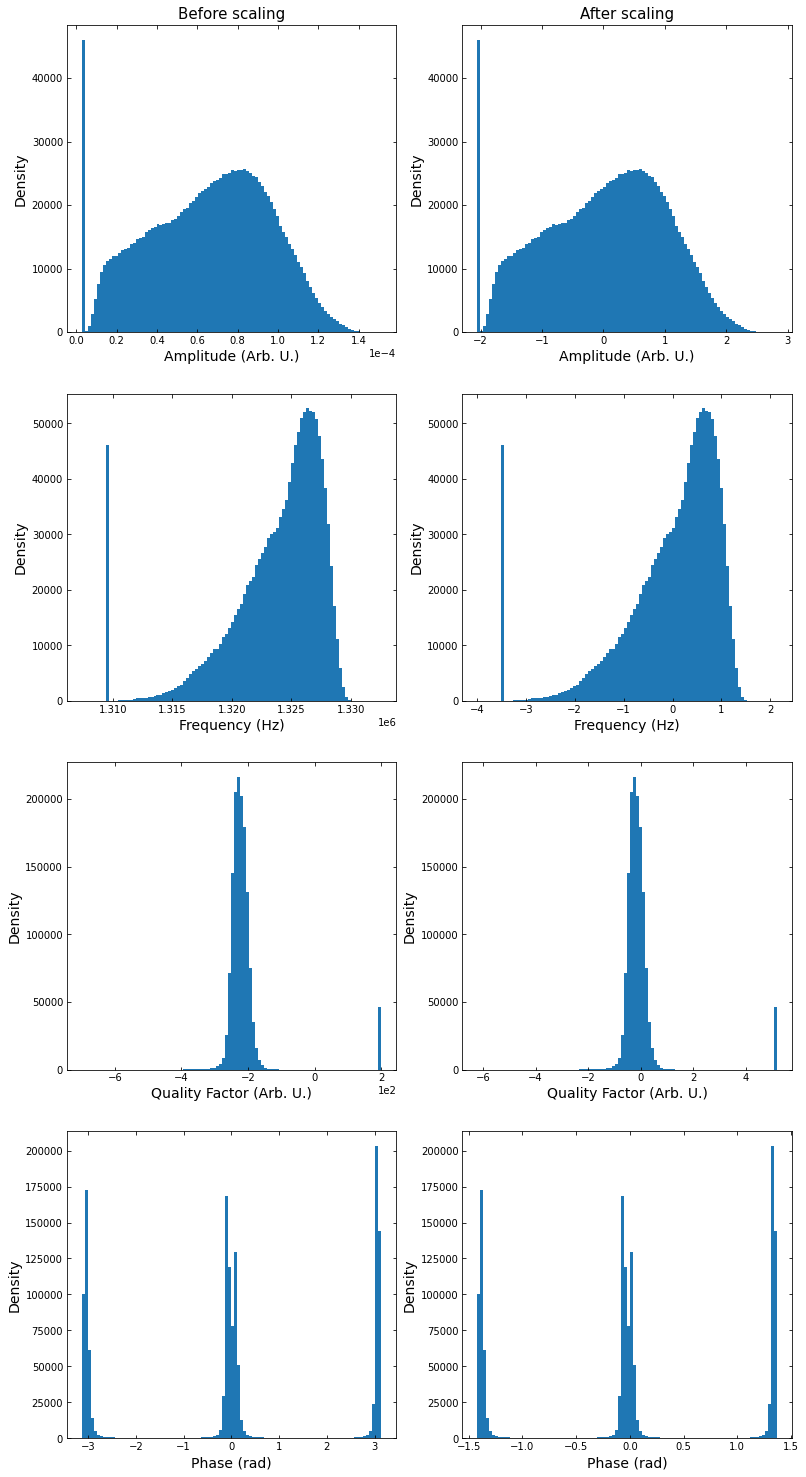

In [35]:
# check distrubutions of each parameter before and after scaling
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(13, 26))

units = ['Amplitude (Arb. U.)', 'Frequency (Hz)', 'Quality Factor (Arb. U.)', 'Phase (rad)']

for i in range(4):
  axs[i, 0].hist(fit_results_list[:,:,i].flatten(), 100)
  axs[i, 1].hist(scaled_fit_results[:,i].flatten(), 100)

i = 0
for ax in axs.flat:
    ax.set(xlabel=units[i//2], ylabel='Density')
    i+=1
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

axs[0, 0].set_title("Before scaling", fontsize=15);
axs[0, 1].set_title("After scaling", fontsize=15);

## Scaler

In [36]:
# scale the real component of input data
scaler_real = global_standard_scaler()
scaled_data_real = scaler_real.fit_transform(real_resample).reshape(-1, 80)

# scale the imaginary component of input data
scaler_imag = global_standard_scaler()
scaled_data_imag = scaler_imag.fit_transform(imag_resample).reshape(-1, 80)

# stack both components
data_ = np.stack((scaled_data_real, scaled_data_imag),axis=2)

# scale the parameters (now takes only 4 parameters, excluding the R2)
params_scaler = StandardScaler()
scaled_params = params_scaler.fit_transform(fit_results_list.reshape(-1,5)[:,0:4])

# exclude the R2 parameter
params = fit_results_list.reshape(-1,5)[:,0:4]
print(params.shape)

del real_resample
del imag_resample

mean =  -6.855169e-06 STD =  0.0026878386
mean =  0.00013161483 STD =  0.0027575183
(1382400, 4)


## SHO Fitting Function

### Checking PyTorch Fitting Function
This demonstrates that the PyTorch implementation of the fitting function is identical to numpy

spectra number 110268


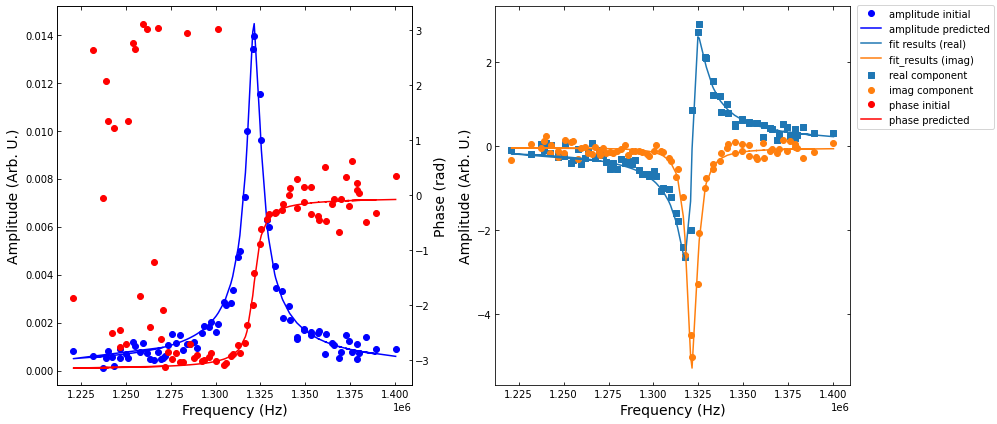

In [37]:
# plot the initial and reconstructed by SHO Fitting Function data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

i = np.random.randint(0, data_.shape[0])
out = SHO_fit_func_torch(torch.tensor(np.atleast_2d(params[i])), wvec_freq)
magnitude_graph_pred, phase_graph_pred = convert_real_imag(out)

print(f'spectra number {i}')
axs[0].plot(wvec_freq, magnitude_graph_initial[i, :], 'o', label='amplitude initial', color='b')
axs[0].plot(wvec_freq, magnitude_graph_pred[0, :], label='amplitude predicted', color='b')
axs[0].set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)');
ax2 = axs[0].twinx()
ax2.plot(wvec_freq, phase_graph_initial[i, :], 'o', label='phase initial', color='r')
ax2.plot(wvec_freq, phase_graph_pred[0, :], label='phase predicted', color='r')
ax2.set(xlabel='Frequency (Hz)', ylabel='Phase (rad)');

axs[1].scatter(wvec_freq, data_[i,:,0],label='real component', marker ='s')
axs[1].scatter(wvec_freq, data_[i,:,1],label='imag component', marker='o')
axs[1].plot(wvec_freq, scaler_real.transform(torch.real(out[0])), label='fit results (real)')
axs[1].plot(wvec_freq, scaler_imag.transform(torch.imag(out[0])), label='fit_results (imag)')
axs[1].set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)');

fig.tight_layout()
fig.legend(bbox_to_anchor=(1.15, 0.97), loc='upper right', borderaxespad=0.);

## PyTorch Model

#### Model Architecture

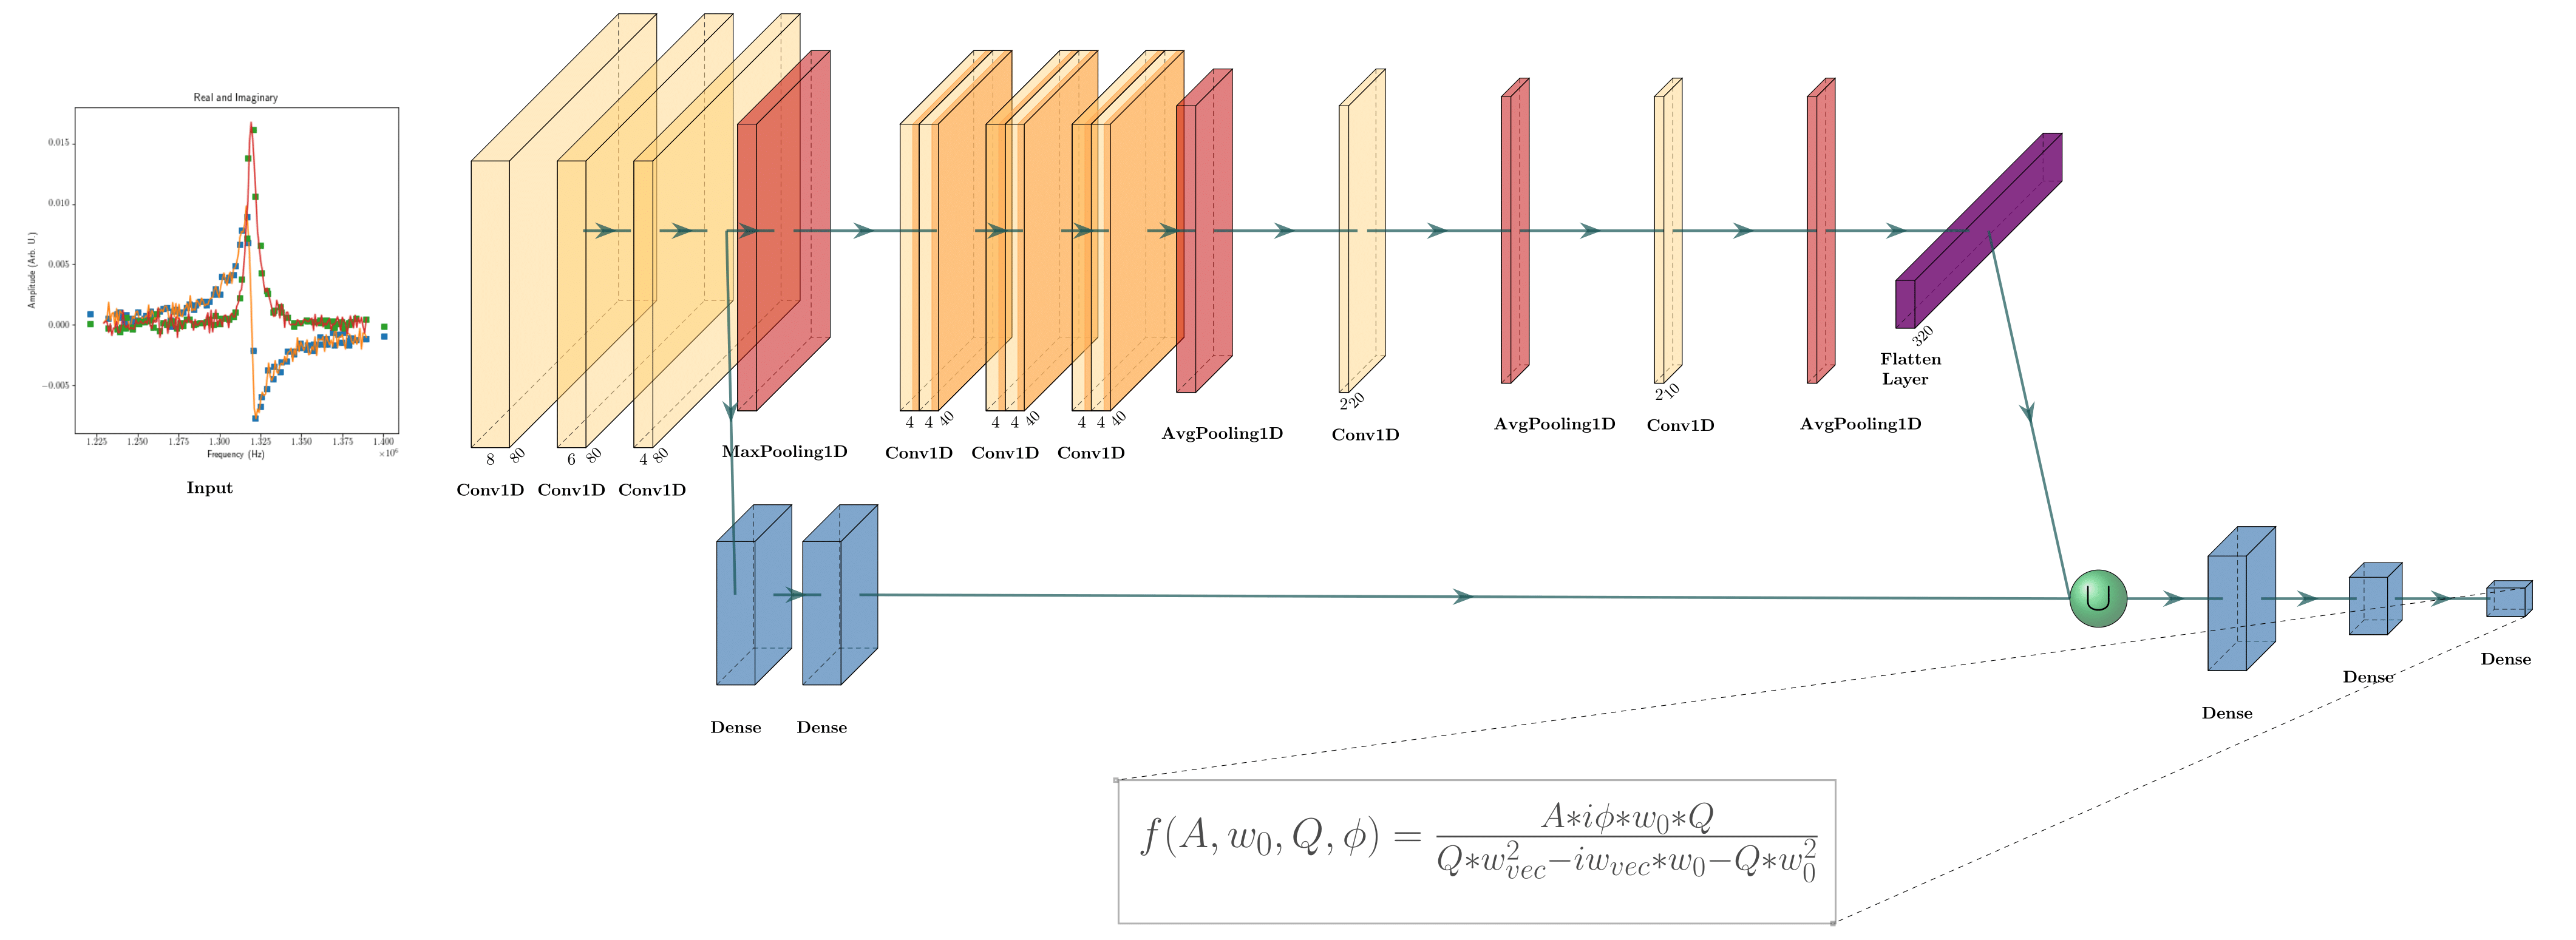

In [38]:
Image(filename='Assets/Figures/model_architecture_sho.png')

### Reconstruction Model

In [39]:
class SHO_Model(nn.Module):
    def __init__(self):
        super().__init__()

        # Input block of 1d convolution
        self.hidden_x1 = nn.Sequential(
            nn.Conv1d(in_channels=2, out_channels=8, kernel_size=7),
            nn.SELU(),
            nn.Conv1d(in_channels=8, out_channels=6, kernel_size=7),
            nn.SELU(),
            nn.Conv1d(in_channels=6, out_channels=4, kernel_size=5),
            nn.SELU(),
        )

        # fully connected block
        self.hidden_xfc = nn.Sequential(
            nn.Linear(256, 20),
            nn.SELU(),
            nn.Linear(20, 20),
            nn.SELU(),
        )

        # 2nd block of 1d-conv layers
        self.hidden_x2 = nn.Sequential(
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=2, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.AvgPool1d(kernel_size=2),
            nn.Conv1d(in_channels=4, out_channels=2, kernel_size=3),
            nn.SELU(),
            nn.AvgPool1d(kernel_size=2),
            nn.Conv1d(in_channels=2, out_channels=2, kernel_size=3),
            nn.SELU(),
            nn.AvgPool1d(kernel_size=2),
        )

        # Flatten layer
        self.flatten_layer = nn.Flatten()
        
        # Final embedding block - Output 4 values - linear
        self.hidden_embedding = nn.Sequential(
            nn.Linear(26, 16),
            nn.SELU(),
            nn.Linear(16, 8),
            nn.SELU(),
            nn.Linear(8, 4),
        )

    def forward(self, x, n=-1):
      x = torch.swapaxes(x, 1, 2) # output shape - samples, (real, imag), frequency
      x = self.hidden_x1(x)
      xfc = torch.reshape(x, (n, 256)) # batch size, features
      xfc = self.hidden_xfc(xfc)
      x = torch.reshape(x, (n, 2, 128)) # batch size, (real, imag), timesteps
      x = self.hidden_x2(x)
      cnn_flat = self.flatten_layer(x)
      encoded = torch.cat((cnn_flat, xfc), 1) # merge dense and 1d conv.
      embedding = self.hidden_embedding(encoded) # output is 4 parameters

      # corrects the scaling of the parameters
      unscaled_param = embedding*torch.tensor(params_scaler.var_[0:4]**0.5).cuda() \
                              + torch.tensor(params_scaler.mean_[0:4]).cuda()

      # passes to the pytorch fitting function 
      fits = SHO_fit_func_torch(unscaled_param, wvec_freq, device='cuda')

      # extract and return real and imaginary      
      real = torch.real(fits)
      real_scaled = (real - torch.tensor(scaler_real.mean).cuda())\
                                        /torch.tensor(scaler_real.std).cuda()
      imag = torch.imag(fits)
      imag_scaled = (imag - torch.tensor(scaler_imag.mean).cuda())\
                                        /torch.tensor(scaler_imag.std).cuda()
      out = torch.stack((real_scaled, imag_scaled), 2)
      return out

### Train/Test Split

In [40]:
data_train, data_test, params_train, params_test = train_test_split(data_, 
                                                                    scaled_params, 
                                                                    test_size=0.7,
                                                                    random_state=42)

params_test_unscaled = params_scaler.inverse_transform(params_test)

#### Training

In [41]:
model = SHO_Model().cuda()

In [42]:
torch.manual_seed(42)
np.random.seed(42)
torch.cuda.empty_cache()

loss_func = torch.nn.MSELoss()
batch_size = 200

# uncomment the code below if you want to try Adam
# optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)
optimizer = AdaHessian(model.parameters(), lr=0.1) #0.1

train_dataloader = DataLoader(data_train, batch_size=batch_size)

epochs = 5
    
for epoch in range(epochs):
  start_time = time.time()

  train_loss = 0.
  total_num = 0

  model.train()

  for train_batch in train_dataloader:
      
    pred = model(train_batch.double().cuda())

    optimizer.zero_grad()

    loss = loss_func(train_batch.double().cuda(), pred)
    loss.backward(create_graph=True)
    train_loss += loss.item() * pred.shape[0]
    total_num += pred.shape[0]

    optimizer.step()

  train_loss /= total_num
  torch.save(model, '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Trained Models/SHO Fitting/model_AdaHessian.pt')
  torch.save(model.state_dict(), '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Trained Models/SHO Fitting/model_AdaHessian.pth')


  print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, train_loss))
  print("--- %s seconds ---" % (time.time() - start_time))

epoch : 1/5, recon loss = 0.06341596
--- 340.35952830314636 seconds ---
epoch : 2/5, recon loss = 0.04488728
--- 337.7027859687805 seconds ---
epoch : 3/5, recon loss = 0.04406543
--- 337.6729700565338 seconds ---
epoch : 4/5, recon loss = 0.04370702
--- 337.7244679927826 seconds ---
epoch : 5/5, recon loss = 0.04348987
--- 338.922589302063 seconds ---


### Computes Inference Time (Code)

In [43]:
# torch.cuda.empty_cache()

# bs = int(.5e6)
# train_dataloader_valid = DataLoader(data_, batch_size=bs)

# # Computes the inference time
# computeTime(model, next(iter(train_dataloader_valid)).double(), batch_size=bs)

#### Checking Performance (Reconstruction)

In [44]:
# prediction of reconstructions
batch_size = 100000
train_dataloader = DataLoader(data_test, batch_size=batch_size)

num_elements = len(train_dataloader.dataset)
num_batches = len(train_dataloader)
predictions = torch.zeros_like(torch.tensor(data_test))

for i, train_batch in enumerate(train_dataloader):
  start = i*batch_size
  end = start + batch_size

  if i == num_batches - 1:
    end = num_elements

  pred_batch = model(train_batch.double().cuda())
  predictions[start:end] = pred_batch.cpu().detach()

  del pred_batch
  del train_batch
  torch.cuda.empty_cache()

In [45]:
data_test_unscaled = data_test.copy()
predictions_unscaled = predictions.numpy().copy()

data_test_unscaled[:, :, 0] = scaler_real.inverse_transform(data_test_unscaled[:, :, 0])
data_test_unscaled[:, :, 1] = scaler_imag.inverse_transform(data_test_unscaled[:, :, 1])
data_test_unscaled = data_test_unscaled[:, :, 0] + 1j * data_test_unscaled[:, :, 1]

predictions_unscaled[:, :, 0] = scaler_real.inverse_transform(predictions_unscaled[:, :, 0])
predictions_unscaled[:, :, 1] = scaler_imag.inverse_transform(predictions_unscaled[:, :, 1])
predictions_unscaled = predictions_unscaled[:, :, 0] + 1j * predictions_unscaled[:, :, 1]

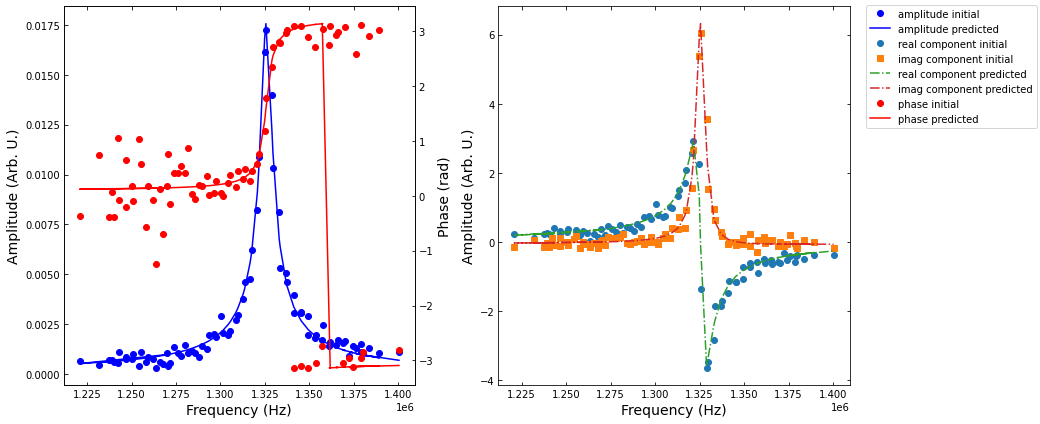

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

i = np.random.randint(0, predictions.shape[0])
magnitude_graph_test, phase_graph_test = convert_real_imag(np.atleast_2d(data_test_unscaled[i, :]))
magnitude_graph_pred, phase_graph_pred = convert_real_imag(np.atleast_2d(predictions_unscaled[i, :]))

axs[0].plot(wvec_freq, magnitude_graph_test[0, :], 'o', label='amplitude initial', color='b')
axs[0].plot(wvec_freq, magnitude_graph_pred[0, :], label='amplitude predicted', color='b')
axs[0].set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)');
ax2 = axs[0].twinx()
ax2.plot(wvec_freq, phase_graph_test[0, :], 'o', label='phase initial', color='r')
ax2.plot(wvec_freq, phase_graph_pred[0, :], label='phase predicted', color='r')
ax2.set(xlabel='Frequency (Hz)', ylabel='Phase (rad)');

axs[1].plot(wvec_freq,
         data_test[i][:,0],'o', 
         label='real component initial')
axs[1].plot(wvec_freq,
         data_test[i][:,1],'s', 
         label='imag component initial')
axs[1].plot(wvec_freq,
         predictions[i].cpu().detach().numpy()[:,0],
         '-.', label='real component predicted')
axs[1].plot(wvec_freq,
         predictions[i].cpu().detach().numpy()[:,1],'-.',
         label='imag component predicted')
axs[1].set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)');

fig.tight_layout()
fig.legend(bbox_to_anchor=(1.2, 0.97), loc='upper right', borderaxespad=0.);

#### 5 Best and Worst Loops

In [47]:
mse_real = mean_squared_error(data_test[:, :, 0], 
                              predictions[:, :, 0].cpu().detach().numpy())
mse_imag = mean_squared_error(data_test[:, :, 1], 
                              predictions[:, :, 1].cpu().detach().numpy())
print('MSE for real component: ' + str(mse_real))
print('MSE for imaginary component: ' + str(mse_imag))

error = (mse_real + mse_imag) / 2.0
print('Average MSE: ' + str(error))

errors = np.sum(np.mean(np.square(data_test - predictions.cpu().detach().numpy()), 1), 1)
errors = np.asarray(errors)
print(errors.shape)

MSE for real component: 0.04450824
MSE for imaginary component: 0.042180073
Average MSE: 0.043344154953956604
(967680,)


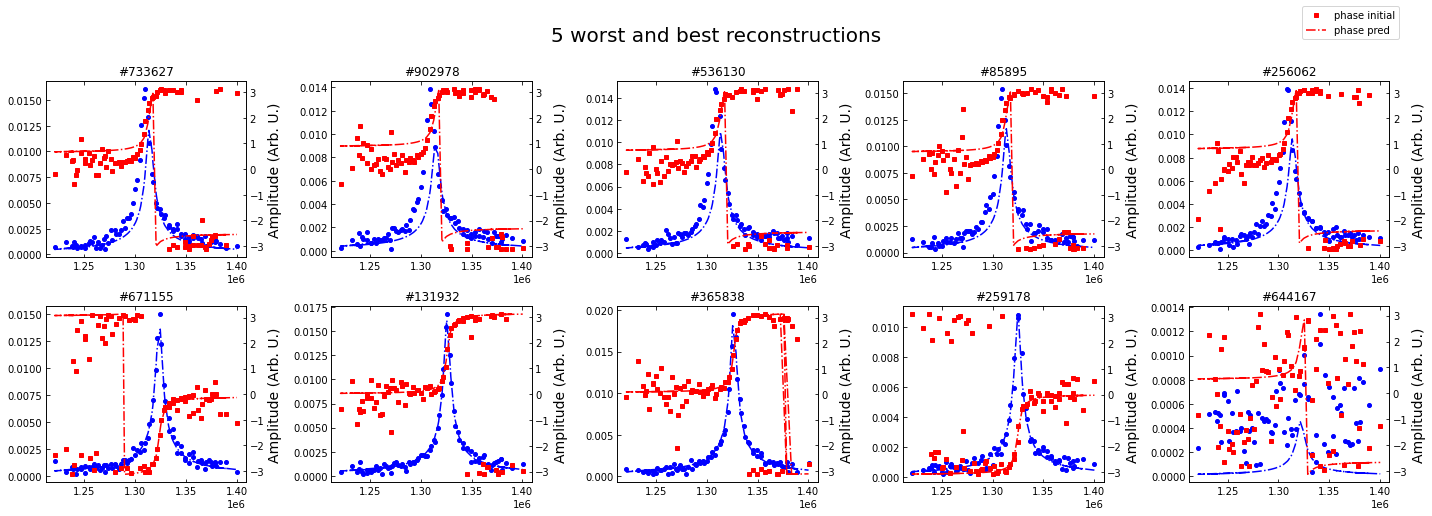

In [48]:
# sorting by highest and lowest MSE
highest = (-errors).argsort()[:5]

plot_best_worst_SHO(data_test_unscaled, predictions_unscaled, highest, wvec_freq)

plt.savefig('Assets/Figures/best_and_worst_5_min_SHO_reconstructions.png')
plt.savefig('Assets/Figures/best_and_worst_5_min_SHO_reconstructions.svg')

### Builds a model to predict the parameters

In [49]:
class SHO_Model(nn.Module):
    def __init__(self):
        super().__init__()

        # Input block of 1d convolution
        self.hidden_x1 = nn.Sequential(
            nn.Conv1d(in_channels=2, out_channels=8, kernel_size=7),
            nn.SELU(),
            nn.Conv1d(in_channels=8, out_channels=6, kernel_size=7),
            nn.SELU(),
            nn.Conv1d(in_channels=6, out_channels=4, kernel_size=5),
            nn.SELU(),
        )

        # fully connected block
        self.hidden_xfc = nn.Sequential(
            nn.Linear(256, 20),
            nn.SELU(),
            nn.Linear(20, 20),
            nn.SELU(),
        )

        # 2nd block of 1d-conv layers
        self.hidden_x2 = nn.Sequential(
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=2, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.Conv1d(in_channels=4, out_channels=4, kernel_size=5),
            nn.SELU(),
            nn.AvgPool1d(kernel_size=2),
            nn.Conv1d(in_channels=4, out_channels=2, kernel_size=3),
            nn.SELU(),
            nn.AvgPool1d(kernel_size=2),
            nn.Conv1d(in_channels=2, out_channels=2, kernel_size=3),
            nn.SELU(),
            nn.AvgPool1d(kernel_size=2),
        )

        # Flatten layer
        self.flatten_layer = nn.Flatten()
        
        # Final embedding block - Output 4 values - linear
        self.hidden_embedding = nn.Sequential(
            nn.Linear(26, 16),
            nn.SELU(),
            nn.Linear(16, 8),
            nn.SELU(),
            nn.Linear(8, 4),
        )

    def forward(self, x, n=-1):
      x = torch.swapaxes(x, 1, 2) # output shape - samples, (real, imag), frequency
      x = self.hidden_x1(x)
      xfc = torch.reshape(x, (n, 256)) # batch size, features
      xfc = self.hidden_xfc(xfc)
      x = torch.reshape(x, (n, 2, 128)) # batch size, (real, imag), timesteps
      x = self.hidden_x2(x)
      cnn_flat = self.flatten_layer(x)
      encoded = torch.cat((cnn_flat, xfc), 1) # merge dense and 1d conv.
      embedding = self.hidden_embedding(encoded) # output is 4 parameters

      # corrects the scaling of the parameters
      unscaled_param = embedding*torch.tensor(params_scaler.var_[0:4]**0.5).cuda() + torch.tensor(params_scaler.mean_[0:4]).cuda()
      return unscaled_param

In [50]:
model_parameters = SHO_Model().cuda()
# loads prior trained model
model_parameters = torch.load('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Trained Models/SHO Fitting/model_AdaHessian.pt')

### Results

#### Checking the performance

In [51]:
# prediction of parameters
batch_size = 100000
train_dataloader = DataLoader(data_test, batch_size=batch_size)

num_elements = len(train_dataloader.dataset)
num_batches = len(train_dataloader)
test_pred_params = torch.zeros_like(torch.tensor(params_test))

for i, train_batch in enumerate(train_dataloader):
  start = i*batch_size
  end = start + batch_size

  if i == num_batches - 1:
    end = num_elements

  pred_batch = model_parameters(train_batch.double().cuda())
  test_pred_params[start:end] = pred_batch.cpu().detach()

  del pred_batch
  del train_batch
  torch.cuda.empty_cache()

In [52]:
print(test_pred_params.shape)
test_pred_params = test_pred_params.view(-1, 4)
test_pred_params = test_pred_params.cpu().detach().numpy()
print(test_pred_params.shape)

torch.Size([967680, 4])
(967680, 4)


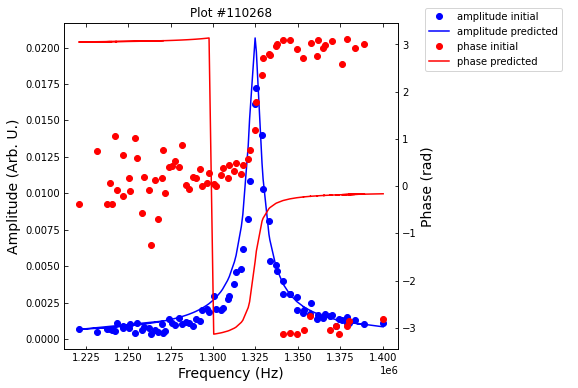

In [53]:
# plot the initial and reconstructed by SHO Fitting Function data
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

i = np.random.randint(0, data_test.shape[0])
out = SHO_fit_func_torch(torch.tensor(np.atleast_2d(test_pred_params[i])), wvec_freq)
magnitude_graph_real, phase_graph_real = convert_real_imag(np.atleast_2d(data_test_unscaled[i, :]))
magnitude_graph_pred, phase_graph_pred = convert_real_imag(out)

axs.plot(wvec_freq, magnitude_graph_test[0, :], 'o', label='amplitude initial', color='b')
axs.plot(wvec_freq, magnitude_graph_pred[0, :], label='amplitude predicted', color='b')
axs.set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)');
ax2 = axs.twinx()
ax2.plot(wvec_freq, phase_graph_test[0, :], 'o', label='phase initial', color='r')
ax2.plot(wvec_freq, phase_graph_pred[0, :], label='phase predicted', color='r')
ax2.set(xlabel='Frequency (Hz)', ylabel='Phase (rad)');
axs.set_title('Plot #' + str(i))
fig.legend(bbox_to_anchor=(1.3, 0.88), loc='upper right', borderaxespad=0.);

#### Unscaling the data to its original values

In [54]:
# making numpy array copies of parameters
test_params_copy = np.copy(params_test_unscaled)
test_pred_params_copy = np.copy(test_pred_params)

In [55]:
params_transformed, pred_params_transformed = transform_params(test_params_copy, test_pred_params_copy)

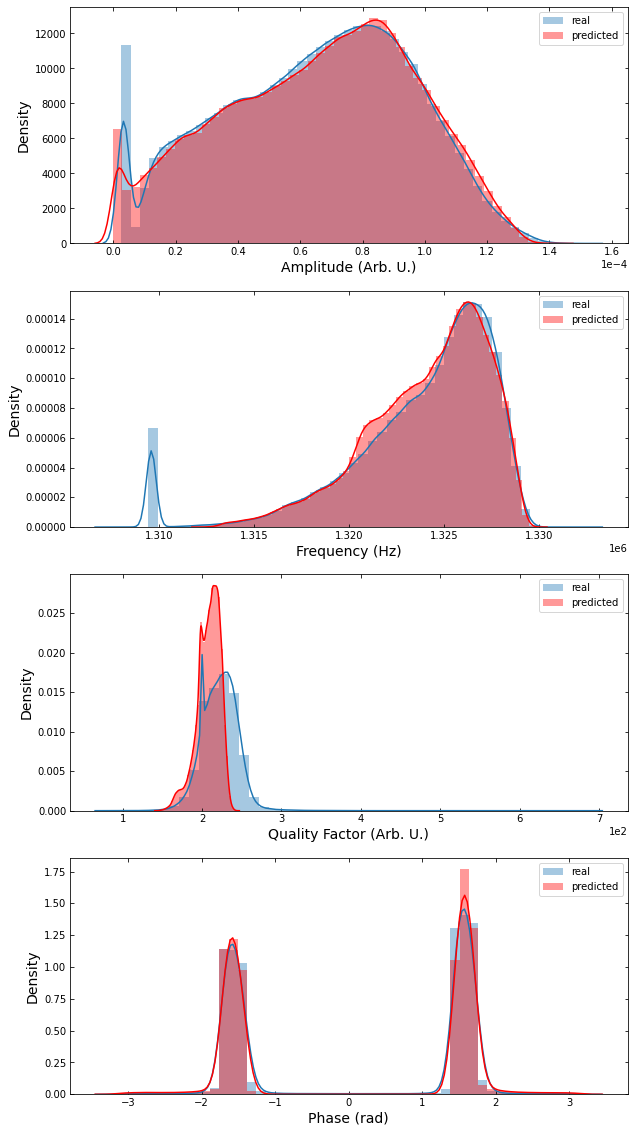

In [56]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

units = ['Amplitude (Arb. U.)', 'Frequency (Hz)', 'Quality Factor (Arb. U.)', 'Phase (rad)']

for i in range(4):
  sns.distplot(params_transformed[:, i].flatten(), ax=axs[i], label='real')
  sns.distplot(pred_params_transformed[:, i].flatten(), color='r', ax=axs[i], label='predicted')

i = 0
for ax in axs.flat:
    ax.set(xlabel=units[i], ylabel='Density')
    i+=1
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    ax.legend();

In [57]:
pred_params_copy_scaled = params_scaler.transform(pred_params_transformed)
params_copy_scaled = params_scaler.transform(params_transformed)

In [58]:
print('Total MSE: ' + str(mean_squared_error(params_copy_scaled, 
                                             pred_params_copy_scaled)))
print('MSE of Amplitude: ' + str(mean_squared_error(params_copy_scaled[:, 0], 
                                                    pred_params_copy_scaled[:, 0])))
print('MSE of Resonance: ' + str(mean_squared_error(params_copy_scaled[:, 1], 
                                                    pred_params_copy_scaled[:, 1])))
print('MSE of Quality-Factor: ' + str(mean_squared_error(params_copy_scaled[:, 2], 
                                                         pred_params_copy_scaled[:, 2])))
print('MSE of Phase: ' + str(mean_squared_error(params_copy_scaled[:, 3], 
                                                pred_params_copy_scaled[:, 3])))

Total MSE: 0.11263205
MSE of Amplitude: 0.009450845
MSE of Resonance: 0.30326077
MSE of Quality-Factor: 0.08563953
MSE of Phase: 0.05308726


In [59]:
mse = np.mean(np.square(params_copy_scaled - pred_params_copy_scaled), 1)

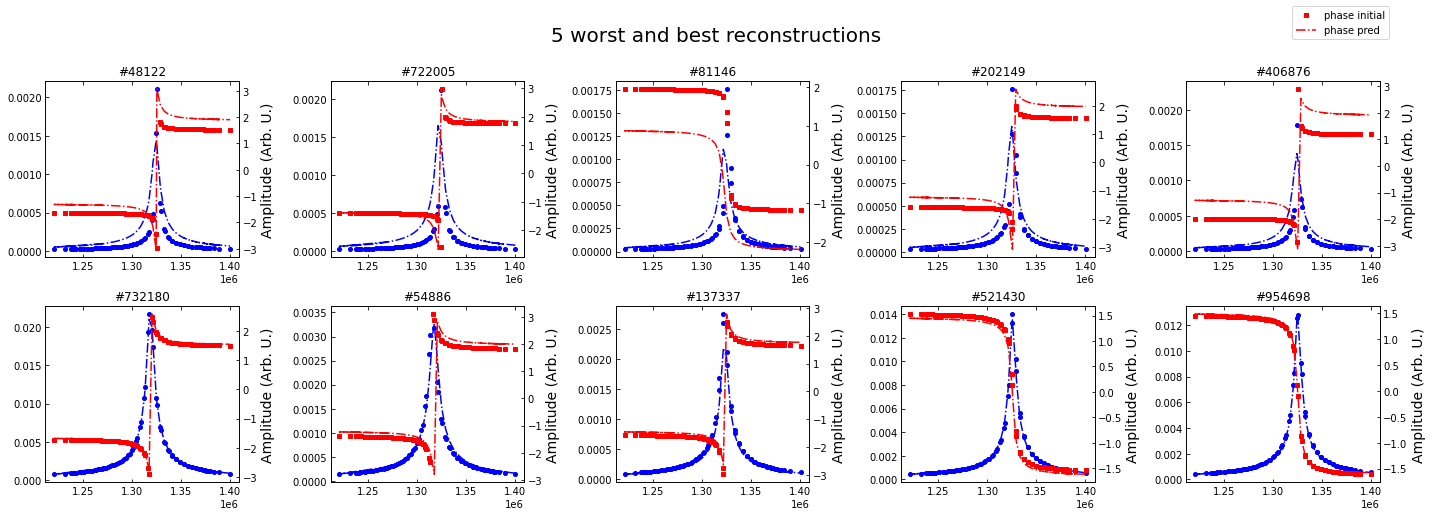

In [60]:
# sorting by highest and lowest MSE
highest = (-mse).argsort()[:5]

fig, axs = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('5 worst and best reconstructions', fontsize=20)

i = 0
for x in highest:
    out_real = SHO_fit_func_torch(torch.tensor(
        np.atleast_2d(params_transformed[x])), wvec_freq)
    out_pred = SHO_fit_func_torch(torch.tensor(
        np.atleast_2d(pred_params_transformed[x])), wvec_freq)
    
    magnitude_graph_real, phase_graph_real = convert_real_imag(out_real)
    magnitude_graph_pred, phase_graph_pred = convert_real_imag(out_pred)

    axs[0, i].plot(wvec_freq, magnitude_graph_real[0, :], 'o', markersize=4,
                        label='amplitude initial', color='b')
    axs[0, i].plot(wvec_freq, magnitude_graph_pred[0, :], '-.', label='amplitude pred', color='b')
    ax1 = axs[0, i].twinx()
    ax1.plot(wvec_freq, phase_graph_real[0, :], 's', markersize=4,
                    label='phase initial', color='r')
    ax1.plot(wvec_freq, phase_graph_pred[0, :], '-.', label='phase pred', color='r')
    ax1.set_title("#" + str(x))
    ax1.set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)')
    i += 1

for i in range(5):
    x = np.random.randint(0, params_transformed.shape[0])
    out_real = SHO_fit_func_torch(torch.tensor(
        np.atleast_2d(params_transformed[x])), wvec_freq)
    out_pred = SHO_fit_func_torch(torch.tensor(
        np.atleast_2d(pred_params_transformed[x])), wvec_freq)
    
    magnitude_graph_real, phase_graph_real = convert_real_imag(out_real)
    magnitude_graph_pred, phase_graph_pred = convert_real_imag(out_pred)

    axs[1, i].plot(wvec_freq, magnitude_graph_real[0, :], 'o', markersize=4,
                        label='amplitude initial', color='b')
    axs[1, i].plot(wvec_freq, magnitude_graph_pred[0, :], '-.', label='amplitude pred', color='b')
    ax2 = axs[1, i].twinx()
    ax2.plot(wvec_freq, phase_graph_real[0, :], 's', markersize=4,
                    label='phase initial', color='r')
    ax2.plot(wvec_freq, phase_graph_pred[0, :], '-.', label='phase pred', color='r')
    ax2.set_title("#" + str(x))
    ax2.set(xlabel='Frequency (Hz)', ylabel='Amplitude (Arb. U.)')
    i += 1

fig.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 2.7), loc='upper right', borderaxespad=0.)
fig.subplots_adjust(top=0.87)

plt.savefig('Assets/Figures/best_and_worst_5_min_SHO_parameters.png')
plt.savefig('Assets/Figures/best_and_worst_5_min_SHO_parameters.svg')

#### Prediction on the whole dataset

In [61]:
# prediction of parameters
batch_size = 100000
train_dataloader = DataLoader(data_, batch_size=batch_size)

num_elements = len(train_dataloader.dataset)
num_batches = len(train_dataloader)
all_pred_params = torch.zeros_like(torch.tensor(params))

for i, train_batch in enumerate(train_dataloader):
  start = i*batch_size
  end = start + batch_size

  if i == num_batches - 1:
    end = num_elements

  pred_batch = model_parameters(train_batch.double().cuda())
  all_pred_params[start:end] = pred_batch.cpu().detach()

  del pred_batch
  del train_batch
  torch.cuda.empty_cache()

print(all_pred_params.shape)
all_pred_params = all_pred_params.cpu().detach().numpy()
print(all_pred_params.shape)

params_copy = np.copy(params)
all_pred_params_copy = np.copy(all_pred_params)

all_params_transformed, all_pred_params_transformed = transform_params(params_copy, all_pred_params_copy)

all_pred_params_scaled = params_scaler.transform(all_pred_params_transformed)
all_params_scaled = params_scaler.transform(all_params_transformed)

torch.Size([1382400, 4])
(1382400, 4)


In [62]:
print('Total MSE: ' + str(mean_squared_error(all_params_scaled, all_pred_params_scaled)))
print('MSE of Amplitude: ' + str(mean_squared_error(all_params_scaled[:, 0], all_pred_params_scaled[:, 0])))
print('MSE of Resonance: ' + str(mean_squared_error(all_params_scaled[:, 1], all_pred_params_scaled[:, 1])))
print('MSE of Quality-Factor: ' + str(mean_squared_error(all_params_scaled[:, 2], all_pred_params_scaled[:, 2])))
print('MSE of Phase: ' + str(mean_squared_error(all_params_scaled[:, 3], all_pred_params_scaled[:, 3])))

Total MSE: 0.11186437
MSE of Amplitude: 0.009457761
MSE of Resonance: 0.3009923
MSE of Quality-Factor: 0.08565368
MSE of Phase: 0.052591026


#### Visualizations of the worst, best and medium loops

In [63]:
data_real = np.copy(scaled_data_real)
data_imag = np.copy(scaled_data_imag)

data_real = scaler_real.inverse_transform(data_real)
data_imag = scaler_imag.inverse_transform(data_imag)

In [64]:
out_sho_nn = SHO_fit_func_torch(torch.tensor(
                              all_pred_params[:]), wvec_freq)
out_sho_lsqf = SHO_fit_func_torch(torch.tensor(
                              params[:]), wvec_freq)

In [65]:
mse_sho_nn = np.mean(np.square(scaled_data_real - scaler_real.transform(tf.convert_to_tensor(torch.real(out_sho_nn)))), 1) + np.mean(np.square(scaled_data_imag - scaler_imag.transform(tf.convert_to_tensor(torch.imag(out_sho_nn)))), 1)
mse_sho_lsqf = np.mean(np.square(scaled_data_real - scaler_real.transform(tf.convert_to_tensor(torch.real(out_sho_lsqf)))), 1) + np.mean(np.square(scaled_data_imag - scaler_imag.transform(tf.convert_to_tensor(torch.imag(out_sho_lsqf)))), 1)
highest_sho_nn = (-mse_sho_nn).argsort()[:]
highest_sho_lsqf = (-mse_sho_lsqf).argsort()[:]
print('MSE of SHO with NN: ' + str(np.mean(mse_sho_nn)))
print('MSE of SHO with LSQF: ' + str(np.mean(mse_sho_lsqf)))

MSE of SHO with NN: 0.08675709309019435
MSE of SHO with LSQF: 0.08750241226539195


In [66]:
mse_sho_nn = np.mean(np.square(scaled_data_real*-1 - scaler_imag.transform(tf.convert_to_tensor(torch.imag(out_sho_nn)))), 1) + np.mean(np.square(scaled_data_imag*-1 - scaler_real.transform(tf.convert_to_tensor(torch.real(out_sho_nn)))), 1)
mse_sho_lsqf = np.mean(np.square(scaled_data_real*-1 - scaler_imag.transform(tf.convert_to_tensor(torch.imag(out_sho_lsqf)))), 1) + np.mean(np.square(scaled_data_imag*-1 - scaler_real.transform(tf.convert_to_tensor(torch.real(out_sho_lsqf)))), 1)
highest_sho_nn = (-mse_sho_nn).argsort()[:]
highest_sho_lsqf = (-mse_sho_lsqf).argsort()[:]
print('MSE of SHO with NN: ' + str(np.mean(mse_sho_nn)))
print('MSE of SHO with LSQF: ' + str(np.mean(mse_sho_lsqf)))

MSE of SHO with NN: 3.895133165186057
MSE of SHO with LSQF: 3.9484442909956408


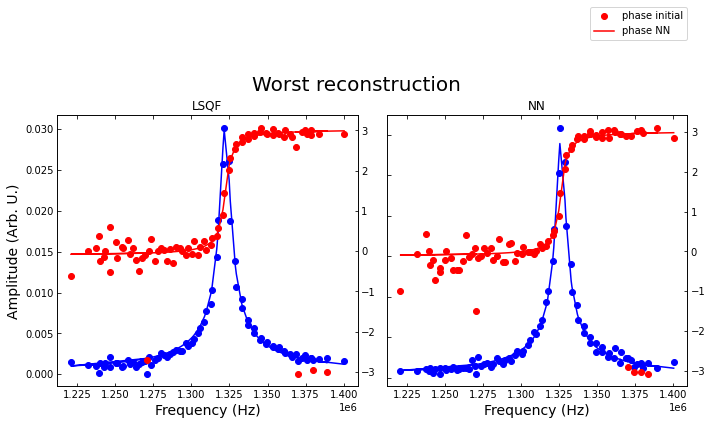

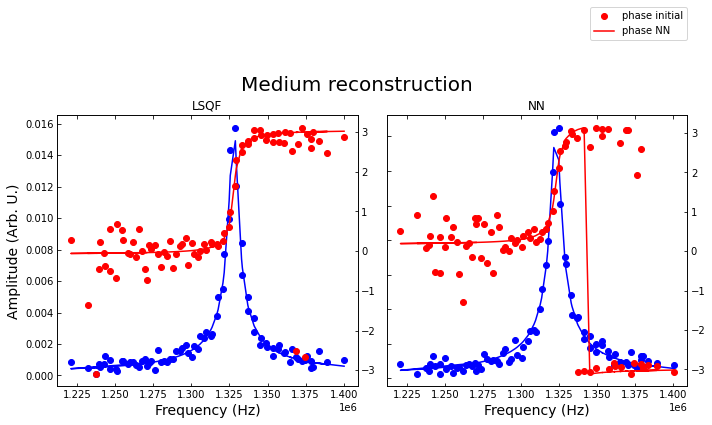

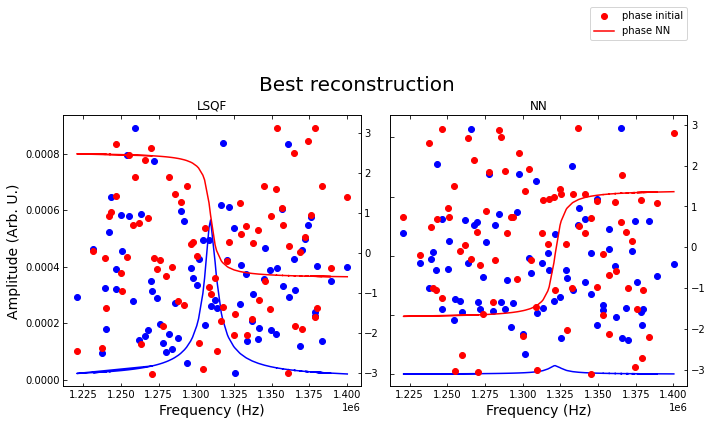

In [67]:
plot_reconstruction_comparison_SHO('Worst', 0, wvec_freq, [params, all_pred_params], [highest_sho_lsqf, highest_sho_nn], [magnitude_graph_initial, phase_graph_initial])
plt.savefig('Assets/Figures/worst_SHO.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/worst_SHO.svg', bbox_inches='tight', pad_inches=1)
plot_reconstruction_comparison_SHO('Medium', data_real.shape[0] // 2, wvec_freq, [params, all_pred_params], [highest_sho_lsqf, highest_sho_nn], [magnitude_graph_initial, phase_graph_initial])
plt.savefig('Assets/Figures/medium_SHO.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/medium_SHO.svg', bbox_inches='tight', pad_inches=1)
plot_reconstruction_comparison_SHO('Best', -1, wvec_freq, [params, all_pred_params], [highest_sho_lsqf, highest_sho_nn], [magnitude_graph_initial, phase_graph_initial])
plt.savefig('Assets/Figures/best_SHO.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/best_SHO.svg', bbox_inches='tight', pad_inches=1)

#### Deleting unnecessary variables

In [68]:
del data_real
del data_imag
del out_sho_nn
del out_sho_lsqf
del mse_sho_nn
del mse_sho_lsqf
del highest_sho_nn
del highest_sho_lsqf
del magnitude_graph_initial_full
del phase_graph_initial_full
del magnitude_graph_initial
del phase_graph_initial
gc.collect();

#### Violin plot visualization of parameters

In [69]:
df_to_plot = pd.DataFrame(np.vstack((all_pred_params_scaled, all_params_scaled)))
df_to_plot = df_to_plot.melt(var_name='Params', value_name='Normalized Params')
df_to_plot['Fit Type'] = 'LSQF'

for i in range(0,8,2):
  df_to_plot.loc[i*all_pred_params_scaled.shape[0]:(i+1)*all_pred_params_scaled.shape[0], 'Fit Type'] = 'NN'

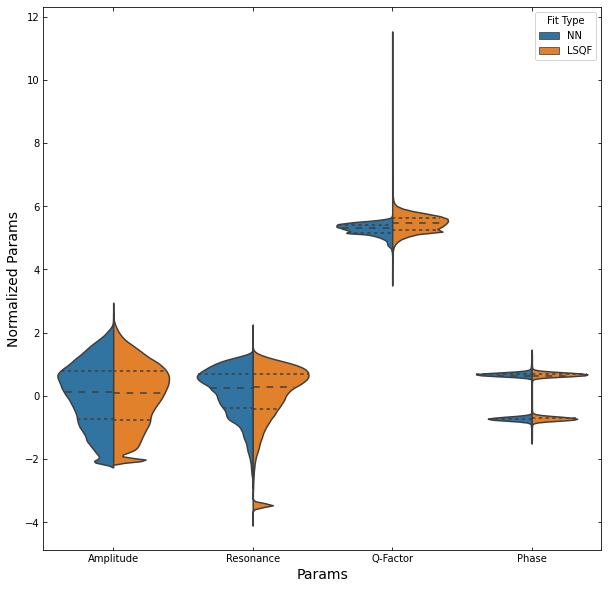

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
# fig.suptitle('Violin plots', fontsize=20)

labels = ['Amplitude', 'Resonance', 'Q-Factor', 'Phase']

sns.violinplot(x='Params', y='Normalized Params', hue='Fit Type', data=df_to_plot, ax=axs, scale='count', split=True, inner='quartile')
axs.set_xticklabels(labels);
sns.set_theme(style='whitegrid')

plt.savefig('Assets/Figures/violin_SHO_params.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/violin_SHO_params.svg', bbox_inches='tight', pad_inches=1)

## Create a movie from maps of parameters

In [71]:
sns.reset_orig()
plt.rcParams['image.cmap'] = 'magma'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
video_duration = 10
if os.path.exists("./Assets/Maps"):
    pass
else:
    os.makedirs("Assets/Maps/Amplitude")
    os.makedirs("Assets/Maps/Resonance")
    os.makedirs("Assets/Maps/Q-Factor")
    os.makedirs("Assets/Maps/Phase")

In [72]:
for img_index in range(0, all_pred_params_transformed[:,0].reshape(num_pix, voltage_steps).shape[1], 2):
  fig = plt.figure(figsize=(4., 4.))
  plt.title('Amplitude', y=1.08)
  plt.axis('off')
  grid = ImageGrid(fig, 111,  # similar to subplot(111)
                nrows_ncols=(2, 2),
                axes_pad=0.4,)  # pad between axes in inch.)
              
  grid[0].imshow(all_params_transformed[:,0].reshape(num_pix,voltage_steps)[:, img_index].reshape(num_pix_1d,num_pix_1d));
  grid[0].axes.set_title("Real Voltage ON");
  grid[0].axis("off");
  grid[1].imshow(all_params_transformed[:,0].reshape(num_pix,voltage_steps)[:, img_index+1].reshape(num_pix_1d,num_pix_1d));
  grid[1].axes.set_title("Real Voltage Off");
  grid[1].axis("off");
  grid[2].imshow(all_pred_params_transformed[:,0].reshape(num_pix,voltage_steps)[:, img_index].reshape(num_pix_1d,num_pix_1d));
  grid[2].axes.set_title("Pred Voltage ON");
  grid[2].axis("off");
  grid[3].imshow(all_pred_params_transformed[:,0].reshape(num_pix,voltage_steps)[:, img_index+1].reshape(num_pix_1d,num_pix_1d));
  grid[3].axes.set_title("Pred Voltage Off");
  grid[3].axis("off");

  plt.savefig('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Maps/Amplitude/' + str(img_index//2) + '.png');
  plt.close(fig)

make_movie('amplitude_movie', '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Maps/Amplitude/', '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies', file_format='png', fps=4)
amplitude_clip = VideoFileClip('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/amplitude_movie.mp4')
amplitude_clip = amplitude_clip.set_duration(10)

amplitude_clip.ipython_display(width = 480)

[MoviePy] >>>> Building video /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/amplitude_movie.mp4
[MoviePy] Writing video /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/amplitude_movie.mp4


 99%|█████████▉| 192/193 [00:02<00:00, 79.50it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/amplitude_movie.mp4 



 98%|█████████▊| 40/41 [00:00<00:00, 51.65it/s]


In [73]:
for img_index in range(0, all_pred_params_transformed[:,0].reshape(num_pix, voltage_steps).shape[1], 2):
  fig = plt.figure(figsize=(4., 4.))
  plt.title('Resonance', y=1.08)
  plt.axis('off')
  grid = ImageGrid(fig, 111,  # similar to subplot(111)
                nrows_ncols=(2, 2),
                axes_pad=0.4,)  # pad between axes in inch.)
              
  grid[0].imshow(all_params_transformed[:,1].reshape(num_pix,voltage_steps)[:, img_index].reshape(num_pix_1d,num_pix_1d));
  grid[0].axes.set_title("Real Voltage ON");
  grid[0].axis("off");
  grid[1].imshow(all_params_transformed[:,1].reshape(num_pix,voltage_steps)[:, img_index+1].reshape(num_pix_1d,num_pix_1d));
  grid[1].axes.set_title("Real Voltage Off");
  grid[1].axis("off");
  grid[2].imshow(all_pred_params_transformed[:,1].reshape(num_pix,voltage_steps)[:, img_index].reshape(num_pix_1d,num_pix_1d));
  grid[2].axes.set_title("Pred Voltage ON");
  grid[2].axis("off");
  grid[3].imshow(all_pred_params_transformed[:,1].reshape(num_pix,voltage_steps)[:, img_index+1].reshape(num_pix_1d,num_pix_1d));
  grid[3].axes.set_title("Pred Voltage Off");
  grid[3].axis("off");

  plt.savefig('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Maps/Resonance/' + str(img_index//2) + '.png');
  plt.close(fig)

make_movie('resonance_movie', '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Maps/Resonance/', '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies', file_format='png', fps=4)
resonance_clip = VideoFileClip('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/resonance_movie.mp4')
resonance_clip = resonance_clip.set_duration(10)

resonance_clip.ipython_display(width = 480)

[MoviePy] >>>> Building video /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/resonance_movie.mp4
[MoviePy] Writing video /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/resonance_movie.mp4


 99%|█████████▉| 192/193 [00:02<00:00, 88.83it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/resonance_movie.mp4 



 98%|█████████▊| 40/41 [00:00<00:00, 672.05it/s]


In [74]:
for img_index in range(0, all_pred_params_transformed[:,0].reshape(num_pix, voltage_steps).shape[1], 2):
  fig = plt.figure(figsize=(4., 4.))
  plt.title('Q-Factor', y=1.08)
  plt.axis('off')
  grid = ImageGrid(fig, 111,  # similar to subplot(111)
                nrows_ncols=(2, 2),
                axes_pad=0.4,)  # pad between axes in inch.)
              
  grid[0].imshow(all_params_transformed[:,2].reshape(num_pix,voltage_steps)[:, img_index].reshape(num_pix_1d,num_pix_1d));
  grid[0].axes.set_title("Real Voltage ON");
  grid[0].axis("off");
  grid[1].imshow(all_params_transformed[:,2].reshape(num_pix,voltage_steps)[:, img_index+1].reshape(num_pix_1d,num_pix_1d));
  grid[1].axes.set_title("Real Voltage Off");
  grid[1].axis("off");
  grid[2].imshow(all_pred_params_transformed[:,2].reshape(num_pix,voltage_steps)[:, img_index].reshape(num_pix_1d,num_pix_1d));
  grid[2].axes.set_title("Pred Voltage ON");
  grid[2].axis("off");
  grid[3].imshow(all_pred_params_transformed[:,2].reshape(num_pix,voltage_steps)[:, img_index+1].reshape(num_pix_1d,num_pix_1d));
  grid[3].axes.set_title("Pred Voltage Off");
  grid[3].axis("off");

  plt.savefig('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Maps/Q-Factor/' + str(img_index//2) + '.png');
  plt.close(fig)

make_movie('q_factor_movie', '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Maps/Q-Factor/', '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies', file_format='png', fps=4)
q_factor_clip = VideoFileClip('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/q_factor_movie.mp4')
q_factor_clip = q_factor_clip.set_duration(10)

q_factor_clip.ipython_display(width = 480)

[MoviePy] >>>> Building video /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/q_factor_movie.mp4
[MoviePy] Writing video /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/q_factor_movie.mp4


 99%|█████████▉| 192/193 [00:02<00:00, 84.68it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/q_factor_movie.mp4 



 98%|█████████▊| 40/41 [00:00<00:00, 633.80it/s]


In [75]:
for img_index in range(0, all_pred_params_transformed[:,0].reshape(num_pix, voltage_steps).shape[1], 2):
  fig = plt.figure(figsize=(4., 4.))
  plt.title('Phase', y=1.08)
  plt.axis('off')
  grid = ImageGrid(fig, 111,  # similar to subplot(111)
                nrows_ncols=(2, 2),
                axes_pad=0.4,)  # pad between axes in inch.)
              
  grid[0].imshow(all_params_transformed[:,3].reshape(num_pix,voltage_steps)[:, img_index].reshape(num_pix_1d,num_pix_1d));
  grid[0].axes.set_title("Real Voltage ON");
  grid[0].axis("off");
  grid[1].imshow(all_params_transformed[:,3].reshape(num_pix,voltage_steps)[:, img_index+1].reshape(num_pix_1d,num_pix_1d));
  grid[1].axes.set_title("Real Voltage Off");
  grid[1].axis("off");
  grid[2].imshow(all_pred_params_transformed[:,3].reshape(num_pix,voltage_steps)[:, img_index].reshape(num_pix_1d,num_pix_1d));
  grid[2].axes.set_title("Pred Voltage ON");
  grid[2].axis("off");
  grid[3].imshow(all_pred_params_transformed[:,3].reshape(num_pix,voltage_steps)[:, img_index+1].reshape(num_pix_1d,num_pix_1d));
  grid[3].axes.set_title("Pred Voltage Off");
  grid[3].axis("off");

  plt.savefig('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Maps/Phase/' + str(img_index//2) + '.png');
  plt.close(fig)

make_movie('phase_movie', '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Maps/Phase/', '/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies', file_format='png', fps=4)
phase_clip = VideoFileClip('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/phase_movie.mp4')
phase_clip = phase_clip.set_duration(10)

phase_clip.ipython_display(width = 480)

[MoviePy] >>>> Building video /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/phase_movie.mp4
[MoviePy] Writing video /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/phase_movie.mp4


 99%|█████████▉| 192/193 [00:02<00:00, 89.18it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Assets/Movies/phase_movie.mp4 



 98%|█████████▊| 40/41 [00:00<00:00, 696.55it/s]


### Movies per timestep visualization

In [76]:
nn_maps = all_pred_params_transformed[:, :].reshape(num_pix, voltage_steps, -1)[:, ::2][:, voltage_steps//4-1:]
lsqf_maps = all_params_transformed[:, :].reshape(num_pix, voltage_steps, -1)[:, ::2][:, voltage_steps//4-1:]

In [77]:
if os.path.exists("./Assets/Maps/Waveform"):
    pass
else:
    os.makedirs("Assets/Maps/Waveform")

if os.path.exists("./Assets/Maps/Compared"):
    pass
else:
    os.makedirs("Assets/Maps/Compared")

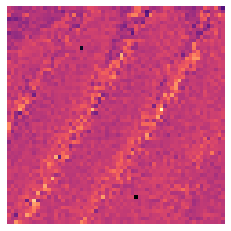

In [78]:
for voltage_step in range(0, nn_maps.shape[0], 12):
  if(voltage_step>96):
    break
  img_index = voltage_step // 12
  for param in range(4):
      plt.imshow(nn_maps[:, voltage_step, param].reshape(num_pix_1d,num_pix_1d))
      plt.axis('off')
      plt.savefig('./Assets/Maps/Waveform/map_nn_' + str(param) + '_' + str(img_index) + '.png', bbox_inches='tight', pad_inches=0)
      plt.imshow(lsqf_maps[:, voltage_step, param].reshape(num_pix_1d,num_pix_1d))
      plt.axis('off')
      plt.savefig('./Assets/Maps/Waveform/map_lsqf_' + str(param) + '_' + str(img_index) + '.png', bbox_inches='tight', pad_inches=0)

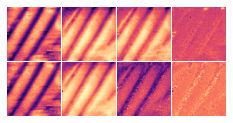

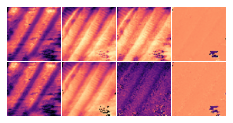

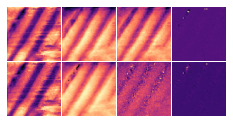

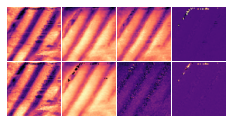

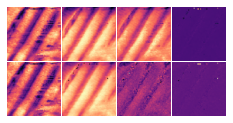

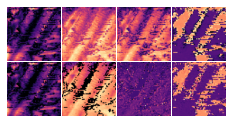

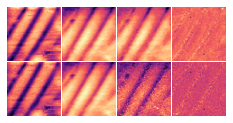

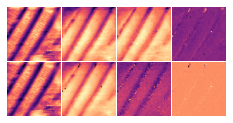

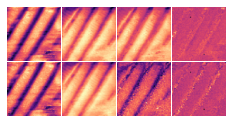

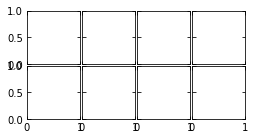

In [79]:
for voltage_step in range(0, nn_maps.shape[0], 12):
  fig = plt.figure(figsize=(8., 2.))
  grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(2, 4))
  if(voltage_step>96):
    break
  img_index = voltage_step // 12
  imgs = []
  for param in range(4):
    imgs.append(mpimg.imread('./Assets/Maps/Waveform/map_nn_' + str(param) + '_' + str(img_index) + '.png'))
    imgs.append(mpimg.imread('./Assets/Maps/Waveform/map_lsqf_' + str(param) + '_' + str(img_index) + '.png'))

  for i in range(0, 8, 2):
    grid[i//2].imshow(imgs[i])
    grid[i//2].axis('off')

  for i in range(1, 9, 2):
    grid[i//2+4].imshow(imgs[i])
    grid[i//2+4].axis('off')
  
  plt.savefig('./Assets/Maps/Compared/map_voltage_step_' + str(voltage_step), bbox_inches='tight', pad_inches=0)

  clear_output(wait=True)

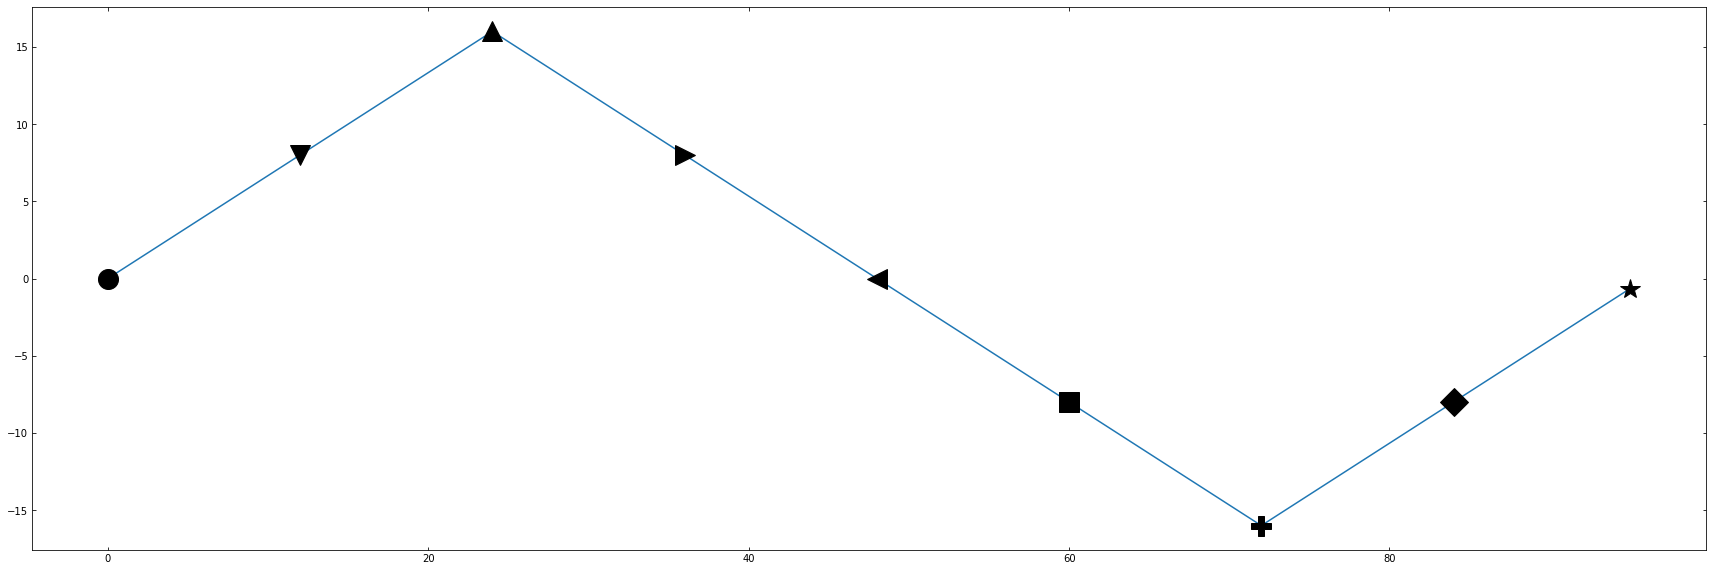

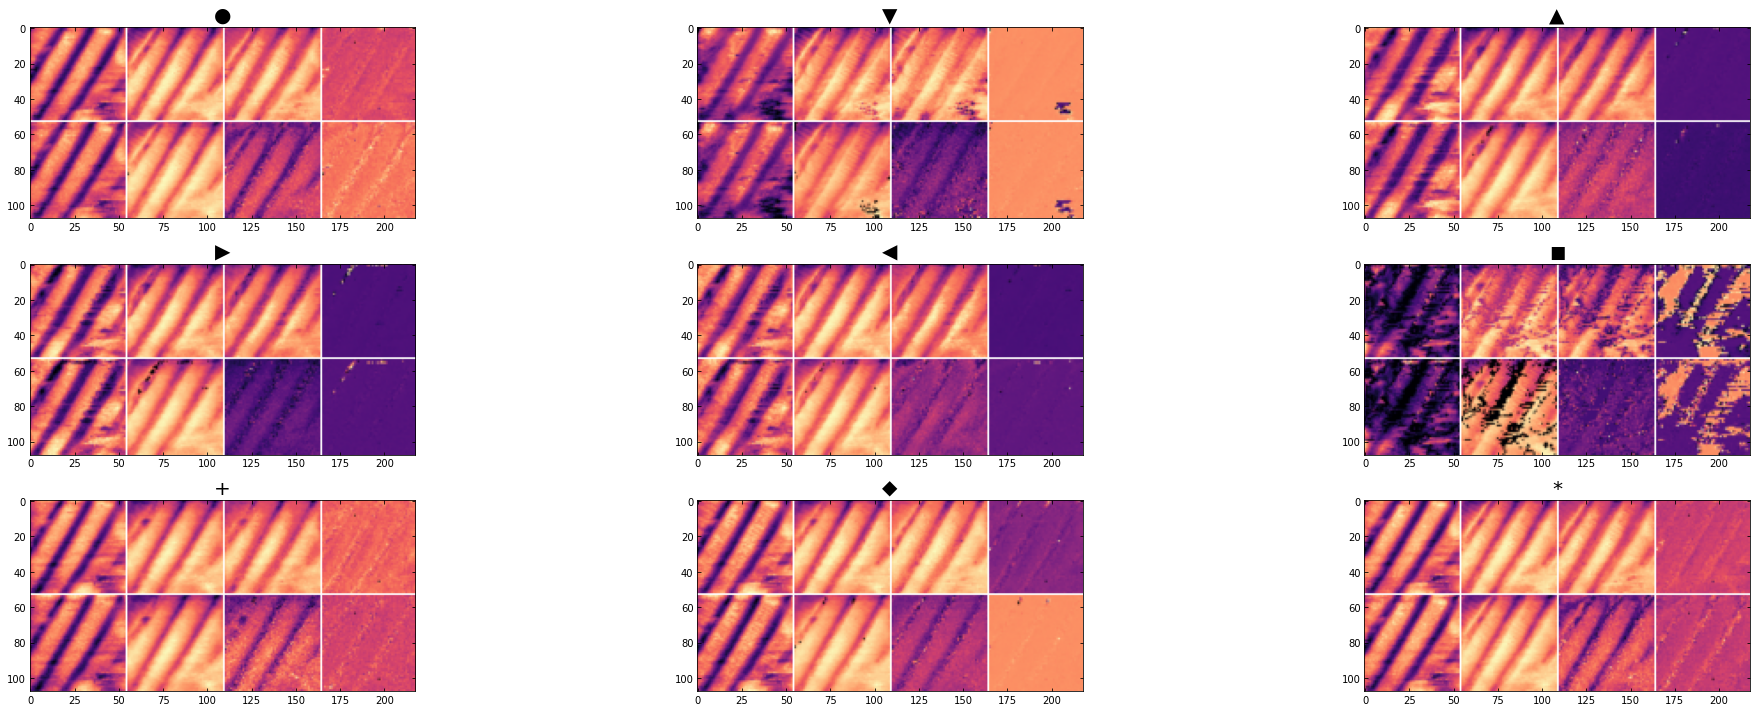

In [80]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30, 10))
axs.plot(spectroscopic_values[1, ::165][192::2] * spectroscopic_values[2, ::165][192::2])
markers = ['o', 'v', '^', '>', '<', 's', 'P', 'D', '*']

for voltage_step in range(0, nn_maps.shape[0], 12):
  if(voltage_step>96):
    break
  img_index = voltage_step // 12
  if(voltage_step==96):
    voltage_step -= 1
  xy = (voltage_step, (spectroscopic_values[1, ::165][192::2] * spectroscopic_values[2, ::165][192::2])[voltage_step])

  axs.plot(xy[0], xy[1], markers[img_index], markersize=20, color='black')

plt.savefig('Assets/Figures/maps_waveform_1.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/maps_waveform_1.svg', bbox_inches='tight', pad_inches=1)
plt.show();

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 10))
axs[0, 0].imshow(mpimg.imread('./Assets/Maps/Compared/map_voltage_step_0.png'))
axs[0, 0].set_title('●', fontsize=20)
axs[0, 1].imshow(mpimg.imread('./Assets/Maps/Compared/map_voltage_step_12.png'))
axs[0, 1].set_title('▼', fontsize=20)
axs[0, 2].imshow(mpimg.imread('./Assets/Maps/Compared/map_voltage_step_24.png'))
axs[0, 2].set_title('▲', fontsize=20)
axs[1, 0].imshow(mpimg.imread('./Assets/Maps/Compared/map_voltage_step_36.png'))
axs[1, 0].set_title('▶', fontsize=20)
axs[1, 1].imshow(mpimg.imread('./Assets/Maps/Compared/map_voltage_step_48.png'))
axs[1, 1].set_title('◀', fontsize=20)
axs[1, 2].imshow(mpimg.imread('./Assets/Maps/Compared/map_voltage_step_60.png'))
axs[1, 2].set_title('◼', fontsize=20)
axs[2, 0].imshow(mpimg.imread('./Assets/Maps/Compared/map_voltage_step_72.png'))
axs[2, 0].set_title('+', fontsize=20)
axs[2, 1].imshow(mpimg.imread('./Assets/Maps/Compared/map_voltage_step_84.png'))
axs[2, 1].set_title('◆', fontsize=20)
axs[2, 2].imshow(mpimg.imread('./Assets/Maps/Compared/map_voltage_step_96.png'))
axs[2, 2].set_title('*', fontsize=20)

plt.savefig('Assets/Figures/maps_waveform_2.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/maps_waveform_2.svg', bbox_inches='tight', pad_inches=1)

plt.tight_layout()
plt.show();

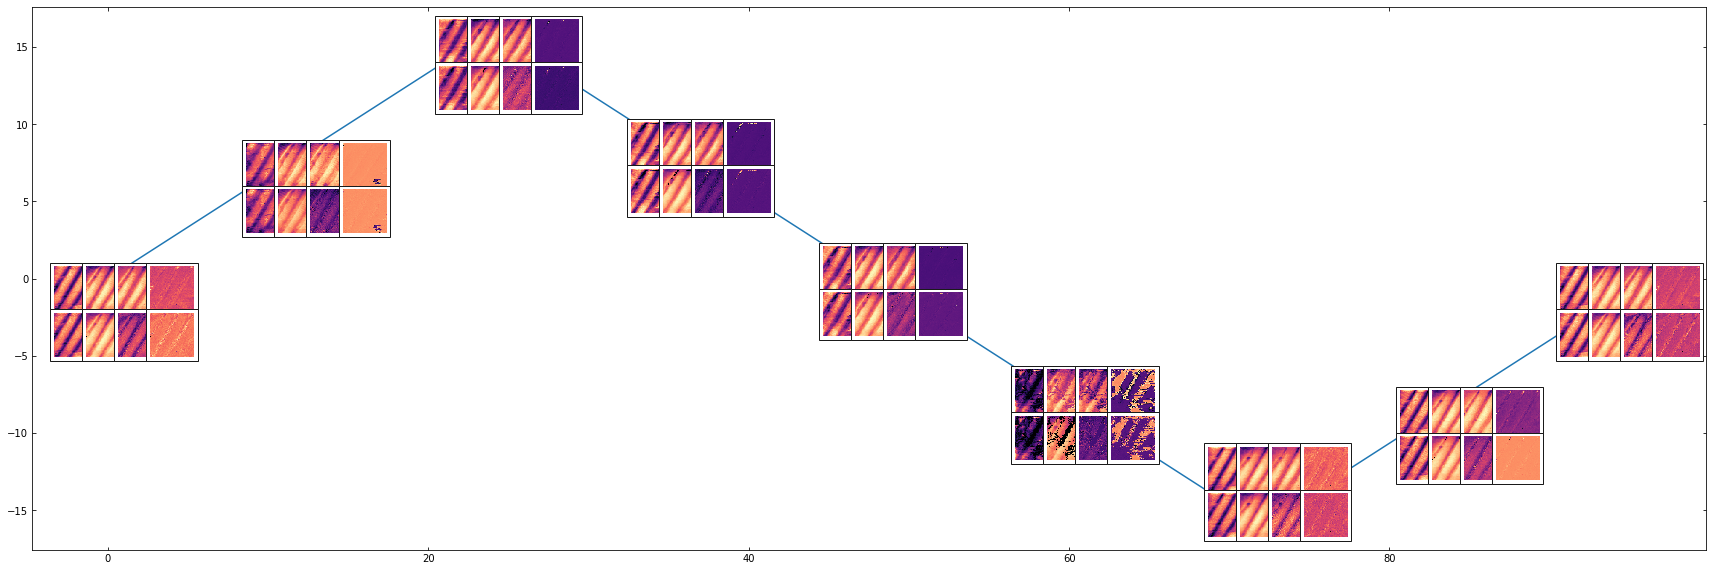

<Figure size 432x288 with 0 Axes>

In [81]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30, 10))

axs.plot(spectroscopic_values[1, ::165][192::2] * spectroscopic_values[2, ::165][192::2])

for voltage_step in range(0, nn_maps.shape[0], 12):
  if(voltage_step>96):
    break
  img_index = voltage_step // 12
  imgs = []
  for param in range(4):
    imgs.append(mpimg.imread('./Assets/Maps/Waveform/map_nn_' + str(param) + '_' + str(img_index) + '.png'))
    imgs.append(mpimg.imread('./Assets/Maps/Waveform/map_lsqf_' + str(param) + '_' + str(img_index) + '.png'))

  for i in range(0, 8, 2):
    x = 0
    y = 0
    if(voltage_step == 96):
      x = -2
    if(voltage_step == 72):
      y = 3
    imagebox_nn = OffsetImage(imgs[i], zoom=0.2)
    imagebox_lsqf = OffsetImage(imgs[i+1], zoom=0.2)
    ab_nn = AnnotationBbox(imagebox_nn, (voltage_step - 2 + i + x, (spectroscopic_values[1, ::165][192::2] * spectroscopic_values[2, ::165][192::2])[voltage_step-1]+y))
    ab_lsqf = AnnotationBbox(imagebox_lsqf, (voltage_step - 2 + i + x, (spectroscopic_values[1, ::165][192::2] * spectroscopic_values[2, ::165][192::2])[voltage_step-1]-3+y))
    axs.add_artist(ab_nn)
    axs.add_artist(ab_lsqf)

    plt.grid()
    plt.draw()

plt.show();
plt.savefig('Assets/Figures/maps_waveform.png');
plt.savefig('Assets/Figures/maps_waveform.svg');

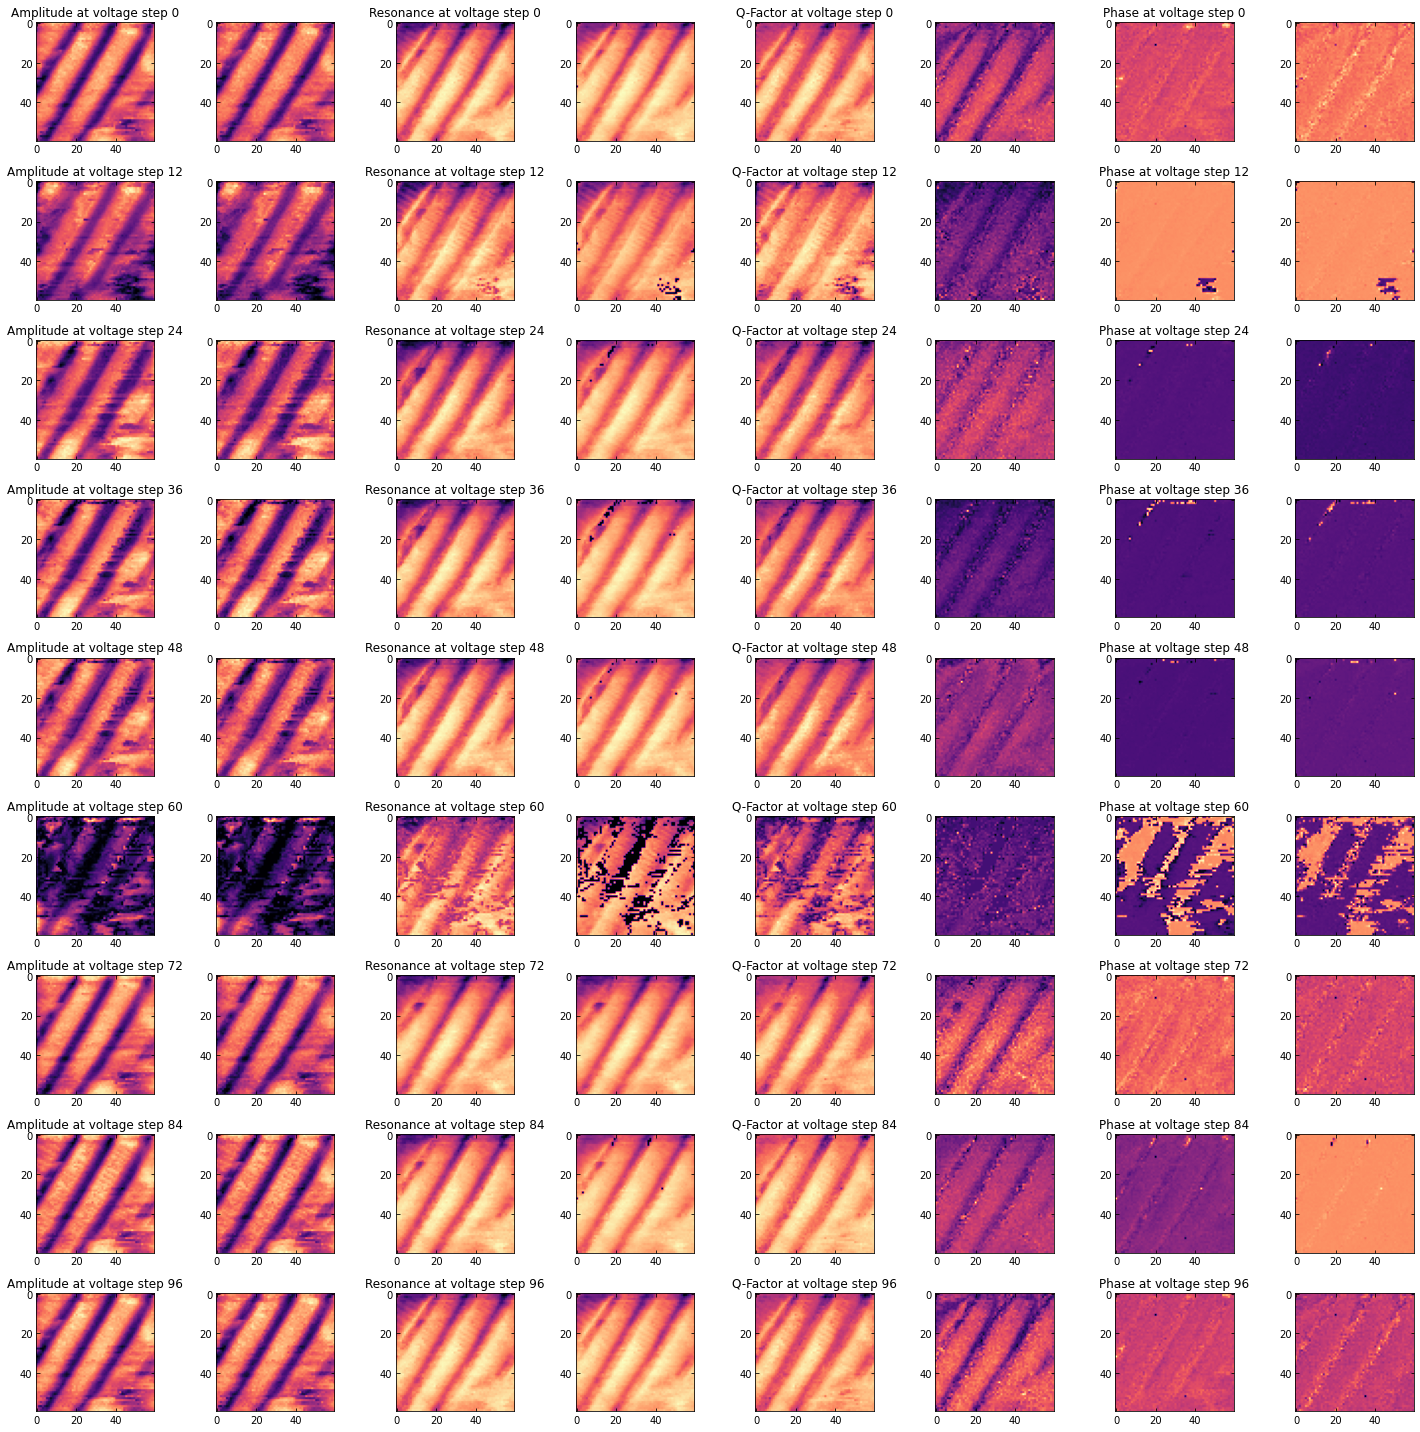

In [82]:
# DELETE LATER
fig, axs = plt.subplots(nrows=9, ncols=8, figsize=(20, 20))

for voltage_step in range(0, nn_maps.shape[0], 12):
  if(voltage_step>96):
    break
  img_index = voltage_step // 12
  axs[img_index, 0].imshow(nn_maps[:, voltage_step, 0].reshape(num_pix_1d,num_pix_1d))
  axs[img_index, 0].set_title('Amplitude at voltage step ' + str(voltage_step))
  axs[img_index, 1].imshow(lsqf_maps[:, voltage_step, 0].reshape(num_pix_1d,num_pix_1d))
  axs[img_index, 2].imshow(nn_maps[:, voltage_step, 1].reshape(num_pix_1d,num_pix_1d))
  axs[img_index, 2].set_title('Resonance at voltage step ' + str(voltage_step))
  axs[img_index, 3].imshow(lsqf_maps[:, voltage_step, 1].reshape(num_pix_1d,num_pix_1d))
  axs[img_index, 4].imshow(nn_maps[:, voltage_step, 2].reshape(num_pix_1d,num_pix_1d))
  axs[img_index, 4].set_title('Q-Factor at voltage step ' + str(voltage_step))
  axs[img_index, 5].imshow(lsqf_maps[:, voltage_step, 2].reshape(num_pix_1d,num_pix_1d))
  axs[img_index, 6].imshow(nn_maps[:, voltage_step, 3].reshape(num_pix_1d,num_pix_1d))
  axs[img_index, 6].set_title('Phase at voltage step ' + str(voltage_step))
  axs[img_index, 7].imshow(lsqf_maps[:, voltage_step, 3].reshape(num_pix_1d,num_pix_1d))

plt.tight_layout()

## Saving to the PyUSID File

In [83]:
all_pred_params_reshaped = np.reshape(all_pred_params, (num_pix, voltage_steps, -1))

In [84]:
amp = np.array(all_pred_params_reshaped[:, :, 0], dtype=[('Amplitude', 'float32')])
res = np.array(all_pred_params_reshaped[:, :, 1], dtype=[('Resonance', 'float32')])
qfc = np.array(all_pred_params_reshaped[:, :, 2], dtype=[('Q-Factor', 'float32')])
ph = np.array(all_pred_params_reshaped[:, :, 3], dtype=[('Phase', 'float32')])

In [85]:
params_list = rfn.merge_arrays((amp, res, qfc, ph), flatten = True, usemask = False)
params_list = params_list.reshape((num_pix, voltage_steps))

In [86]:
h5_results_grp = create_results_group(h5_f['Measurement_000']['Channel_000']['Raw_Data'], 'Predictions', h5_parent_group=h5_f['Measurement_000']['Channel_000'])

pos_sizes = [num_pix_1d, num_pix_1d]
pos_names = ['X', 'Y']
pos_units = ['nm', 'um']
pos_dims = []
for length, name, units in zip(pos_sizes, pos_names, pos_units):
    pos_dims.append(Dimension(name, units, np.arange(length)))

spec_sizes = [voltage_steps]
spec_names = ['Cycle']
spec_units = ['V']
spec_dims = []
for length, name, units in zip(spec_sizes, spec_names, spec_units):
    spec_dims.append(Dimension(name, units, np.arange(length)))

In [87]:
write_main_dataset(h5_results_grp,
                    params_list, 'SHO-Pred-Results', 
                    '(Amplitude, Resonance, Q-Factor, Phase)', 
                    '(Arb. U., Frequency (Hz), Arb. U., rad)',
                    pos_dims, spec_dims)

<HDF5 dataset "SHO_Pred_Results": shape (3600, 384), type "|V16">
located at: 
	/Measurement_000/Channel_000/Raw_Data-Predictions_000/SHO_Pred_Results 
Data contains: 
	(Amplitude, Resonance, Q-Factor, Phase) ((Arb. U., Frequency (Hz), Arb. U., rad)) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 60 
	X - size: 60 
Spectroscopic Dimensions: 
	Cycle - size: 384
Data Fields:
	Amplitude, Resonance, Q-Factor, Phase

In [88]:
usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-Predictions_000
      ------------------------
      ├ Position_Indices
      ├ Position_Values
      ├ SHO_Pred_Results
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies


## Deleting all unnecessary variables

In [89]:
del model
del model_parameters
del train_dataloader
del all_params_scaled
del all_params_transformed
del all_pred_params
del all_pred_params_reshaped
del all_pred_params_scaled
torch.cuda.empty_cache()
gc.collect();

In [90]:
h5_f.close()

# Part II. SHO Fitter On Noisy Data

In [91]:
# all computations were pre-computed on _______ NHI GPU
# set to False if you want to recompute
use_pre_computed_vars = True

## Initializing constants

In [92]:
lowest_noise_real = -1.0 * 0.0026878386
highest_noise_real = 1.0 * 0.0026878386
lowest_noise_imag = -1.0 * 0.0027575183
highest_noise_imag = 1.0 * 0.0027575183

In [93]:
noise_real = np.random.uniform(lowest_noise_real, highest_noise_real, (3600, 63360))
noise_imag = np.random.uniform(lowest_noise_imag, highest_noise_imag, (3600, 63360))

noise = noise_real+noise_imag*1.0j

In [94]:
noise_levels = ['2.0', '4.0', '7.0']

## Recomputing SHO Fits

### Copying initial dataset for the later use

In [95]:
if not use_pre_computed_vars:  
  gdown.download('https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2', 'data_file_noise_2.0.h5', quiet=False)
  gdown.download('https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2', 'data_file_noise_4.0.h5', quiet=False)
  gdown.download('https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2', 'data_file_noise_7.0.h5', quiet=False)

In [96]:
gc.collect();

### Defining important functions

In [97]:
def computeConventionalFits(input_file_path):
  start_time_lsqf = time.time()

  (data_dir, filename) = os.path.split(input_file_path)

  if input_file_path.endswith('.h5'):
      # No translation here
      h5_path = input_file_path
      force = True # Set this to true to force patching of the datafile.
      tl = belib.translators.LabViewH5Patcher()
      tl.translate(h5_path, force_patch=force)
  else:
      # Set the data to be translated
      data_path = input_file_path

      (junk, base_name) = os.path.split(data_dir)

      # Check if the data is in the new or old format.  Initialize the correct translator for the format.
      if base_name == 'newdataformat':
          (junk, base_name) = os.path.split(junk)
          translator = px.io.translators.BEPSndfTranslator(max_mem_mb=max_mem)
      else:
          translator = px.io.translators.BEodfTranslator(max_mem_mb=max_mem)
      if base_name.endswith('_d'):
          base_name = base_name[:-2]
      # Translate the data
      h5_path = translator.translate(data_path, show_plots=True, save_plots=False)

  folder_path, h5_raw_file_name = os.path.split(h5_path)
  h5_file = h5py.File(h5_path, 'r+')
  print('Working on:\n' + h5_path)

  h5_main = usid.hdf_utils.find_dataset(h5_file, 'Raw_Data')[0]

  h5_pos_inds = h5_main.h5_pos_inds
  pos_dims = h5_main.pos_dim_sizes
  pos_labels = h5_main.pos_dim_labels
  print(pos_labels, pos_dims)

  h5_meas_grp = h5_main.parent.parent

  parm_dict = sidpy.hdf_utils.get_attributes(h5_meas_grp)

  expt_type = usid.hdf_utils.get_attr(h5_file, 'data_type')

  is_ckpfm = expt_type == 'cKPFMData'
  if is_ckpfm:
      num_write_steps = parm_dict['VS_num_DC_write_steps']
      num_read_steps = parm_dict['VS_num_read_steps']
      num_fields = 2
      
  if expt_type != 'BELineData':
      vs_mode = usid.hdf_utils.get_attr(h5_meas_grp, 'VS_mode')
      try:
          field_mode = usid.hdf_utils.get_attr(h5_meas_grp, 'VS_measure_in_field_loops')
      except KeyError:
          print('field mode could not be found. Setting to default value')
          field_mode = 'out-of-field'
      try:
          vs_cycle_frac = usid.hdf_utils.get_attr(h5_meas_grp, 'VS_cycle_fraction')
      except KeyError:
          print('VS cycle fraction could not be found. Setting to default value')
          vs_cycle_frac = 'full'

  sho_fit_points = 5  # The number of data points at each step to use when fitting
  sho_override = True  # Force recompute if True

  max_cores = 10

  h5_sho_targ_grp = None
  if True:
      h5_sho_file_path = os.path.join(folder_path, 
                                  h5_raw_file_name.replace('.h5', '_sho_fit.h5'))
      print('\n\nSHO Fits will be written to:\n' + h5_sho_file_path + '\n\n')
      f_open_mode = 'w'
      if os.path.exists(h5_sho_file_path):
          f_open_mode = 'r+'
      h5_sho_file = h5py.File(h5_sho_file_path, mode=f_open_mode)
      h5_sho_targ_grp = h5_sho_file
      
  sho_fitter = belib.analysis.BESHOfitter(h5_main, cores=max_cores, verbose=False, h5_target_group=h5_sho_targ_grp)
  sho_fitter.set_up_guess(guess_func=belib.analysis.be_sho_fitter.SHOGuessFunc.complex_gaussian,
                          num_points=sho_fit_points)
  h5_sho_guess = sho_fitter.do_guess(override=sho_override)
  sho_fitter.set_up_fit()
  h5_sho_fit = sho_fitter.do_fit(override=sho_override)
  parms_dict = parms_dict = sidpy.hdf_utils.get_attributes(h5_main.parent.parent)

  print(f'LSQF method took {time.time() - start_time_lsqf} seconds to compute parameters')

In [98]:
def addNoise(noise_level):
  h5_f_noise = h5py.File(f'./data_file_noise_{noise_level}.h5', 'r+')
  time.sleep(5)
  raw_data_noise = h5_f_noise['Measurement_000']['Channel_000']['Raw_Data']
  noise_level_float = float(noise_level)

  for pixel_ind, pixel_data in enumerate(raw_data_noise):
    raw_data_noise[pixel_ind] += noise[pixel_ind] * noise_level_float
  
  time.sleep(10)
  computeConventionalFits(f'data_file_noise_{noise_level}.h5')
  print(f'Computation for noise level={noise_level} is done!')

### Computing fits

In [99]:
if not use_pre_computed_vars:
  for nl in noise_levels:
    addNoise(nl)

## Using Pre-computed Noisy SHO Fits

In [100]:
if use_pre_computed_vars:
  !unzip noisy_sho_fits.zip

Archive:  noisy_sho_fits.zip
replace data_file_noise_2.0_sho_fit.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_file_noise_2.0_sho_fit.h5  
replace data_file_noise_4.0_sho_fit.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_file_noise_4.0_sho_fit.h5  
replace data_file_noise_7.0_sho_fit.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_file_noise_7.0_sho_fit.h5  


### Defining important functions

In [101]:
def get_fit_params(noise_level):
  h5_f_fit_noise = h5py.File(f'./data_file_noise_{noise_level}_sho_fit.h5', 'r+')
  
  # create a list for parameters
  fit_results_list_noise = []
  for sublist in np.array(h5_f_fit_noise['Raw_Data-SHO_Fit_000']['Fit']):
      for item in sublist:
          for i in item:
              fit_results_list_noise.append(i)

  # flatten parameters list into numpy array
  fit_results_list_noise = np.array(fit_results_list_noise).reshape(num_pix,voltage_steps,5)
  fit_results_list_noise = fit_results_list_noise[:, :, :4]

  fit_results_list_transformed_noise, _ = transform_params(fit_results_list_noise.reshape(-1, 4), fit_results_list_noise.reshape(-1, 4))

  noise_real_nn = (np.real(noise) - (-6.855169e-06)) / 0.0026878386
  noise_imag_nn = (np.imag(noise) - (0.00013161483)) / 0.0027575183

  noise_real_nn = noise_real_nn.reshape(-1, 165)
  noise_imag_nn = noise_imag_nn.reshape(-1, 165)

  noise_nn = np.stack((noise_real_nn, noise_imag_nn), axis=2)
  noise_nn = resample(noise_nn, 80, axis=1)

  noise_level_float = float(noise_level)

  data_noise_nn = data_ + noise_nn * noise_level_float

  # LOADING PARAMS MODEL
  batch_size = 128
  torch.cuda.empty_cache()
  # model_parameters = SHO_Model_Pred().cuda()
  model_parameters = SHO_Model().cuda()
  model_parameters.load_state_dict(torch.load(f'./Trained Models/SHO Fitting/model_AdaHessian_noise_{noise_level}_bs128.pt'))

  # prediction of parameters
  batch_size = 100000
  train_dataloader = DataLoader(data_noise_nn, batch_size=batch_size)

  num_elements = len(train_dataloader.dataset)
  num_batches = len(train_dataloader)
  all_pred_params = torch.zeros_like(torch.tensor(params))

  for i, train_batch in enumerate(train_dataloader):
      start = i*batch_size
      end = start + batch_size

      if i == num_batches - 1:
          end = num_elements

      pred_batch = model_parameters(train_batch.double().cuda())
      all_pred_params[start:end] = pred_batch.cpu().detach()

      del pred_batch
      del train_batch
      torch.cuda.empty_cache()

  all_pred_params = all_pred_params.cpu().detach().numpy()

  params_copy = np.copy(params)
  all_pred_params_copy = np.copy(all_pred_params)

  all_params_transformed_noise, all_pred_params_transformed_noise = transform_params(params_copy, all_pred_params_copy)

  all_pred_params_scaled_noise = params_scaler.transform(all_pred_params_transformed_noise)
  all_params_scaled_noise = params_scaler.transform(all_params_transformed_noise)

  if noise_level == '7.0':
    all_pred_params_transformed_noise[:, 3] = all_pred_params_transformed_noise[:, 3] * -1
  
  # plot distributions
  fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 26))

  units = ['Amplitude (Arb. U.)', 'Frequency (Hz)', 'Quality Factor (Arb. U.)', 'Phase (rad)']

  for i in range(4):
    axs[i, 0].hist(fit_results_list_transformed_noise[:,i].flatten(), 100)
    axs[i, 1].hist(all_pred_params_transformed_noise[:,i].flatten(), 100)
    axs[i, 2].hist(all_params_transformed_noise[:,i].flatten(), 100)

  i = 0
  for ax in axs.flat:
      ax.set(xlabel=units[i//3], ylabel='Density')
      i+=1
      ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

  axs[0, 0].set_title(f"Noise {noise_level} LSQF", fontsize=15);
  axs[0, 1].set_title(f"Noise {noise_level} NN", fontsize=15);
  axs[0, 2].set_title("Without noise", fontsize=15);

  x_min = [-0.1e-3, 1.24e6, -6e2, -3.5]
  x_max = [0.3e-3, 1.36e6, 4e2, 3.5]
  y_max = [1.5e6, 1.4e6, 1.4e6, 0.3e6]

  for j in range(4):
      axs[j, 0].set_xlim(x_min[j], x_max[j])
      axs[j, 1].set_xlim(x_min[j], x_max[j])
      axs[j, 2].set_xlim(x_min[j], x_max[j])
      axs[j, 0].set_ylim(0, y_max[j])
      axs[j, 1].set_ylim(0, y_max[j])
      axs[j, 2].set_ylim(0, y_max[j])
      
  plt.savefig(f'comparison_noise_{noise_level}.png')

### Computing fits

In [ ]:
if use_pre_computed_vars:
  # initial fit
  fit_results_list_init = fit_results_list[:, :, 4]

  # noisy fits
  for nl in noise_levels:
      get_fit_params(nl)

# Part III. Hysteresis Loops 

## Perform fits

In [ ]:
h5_main = h5_f['Measurement_000']['Channel_000']['Raw_Data-SHO_Fit_000']['Guess']
h5_loop_fit, h5_loop_group = fit_loop_function(h5_f, h5_main)

In [ ]:
usid.hdf_utils.print_tree(h5_f)

In [ ]:
proj_nd_shifted = conventional_fit_loop_function(h5_f)

In [ ]:
# getting parameters for the hysteresis loops
params = np.zeros((num_pix, 9))
params_names = ['a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'b_0', 'b_1', 'b_2', 'b_3']

for i in range(9):
  params[:, i] = np.array(h5_f['Measurement_000']['Channel_000']['Raw_Data-SHO_Fit_000']['Guess-Loop_Fit_000']['Fit'][params_names[i]][:, 3])

In [ ]:
# voltage vector
V = np.swapaxes(np.atleast_2d(h5_f['Measurement_000']['Channel_000']['UDVS'][::2][:, 1][24:120]), 0, 1).astype(np.float64)

# to set up a type of loop_fitting function to use. Possible options: ['9 parameters', '13 parameters']
func_type = '9 parameters'

In [ ]:
# creating fits from fitting function and preparing for visualization
loop_fit_results = np.reshape(loop_fitting_function(func_type, V, params), (96, num_pix_1d, num_pix_1d))
proj_nd_shifted_transposed = np.transpose(proj_nd_shifted,(1,0,2,3))

### Hysteresis Loop Graph

In [ ]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=2)
hysteresis_waveform = spectroscopic_values[1, ::165][192:] * spectroscopic_values[2, ::165][192:]
x_start = 120
x_end = 140

axs[0].plot(hysteresis_waveform)
ax_new = fig.add_axes([0.32, 0.6, 0.15, 0.25])
ax_new.plot(np.repeat(hysteresis_waveform, 2))
ax_new.set_xlim(x_start, x_end)
ax_new.set_ylim(0, 15)
ax_new.set_xticks(np.arange(x_start, x_end), 2)
ax_new.set_xticklabels([60, 62, 64, 66, 68, 70]) 
fig.add_artist(ConnectionPatch(xyA=(x_start//2, hysteresis_waveform[x_start//2]), coordsA=axs[0].transData, xyB=(105, 16), coordsB=axs[0].transData, color='green'))
fig.add_artist(ConnectionPatch(xyA=(x_end//2, hysteresis_waveform[x_end//2]), coordsA=axs[0].transData, xyB=(105, 4.5), coordsB=axs[0].transData, color='green'))
axs[0].set_xlabel('Voltage Steps')
axs[0].set_ylabel('Voltage (V)')

i = np.random.randint(0,num_pix_1d,2)
axs[1].plot(V, proj_nd_shifted_transposed[i[0], i[1], :, 3],'blue')
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[1].set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs[1].label_outer()

axs[0].axhline(y=0, xmax=200, linestyle='--', color='black')
axs[1].axhline(y=0, xmin=-16, xmax=16, linestyle='--', color='black')
axs[1].axvline(x=0, linestyle='--', color='black')

plt.savefig('Assets/Figures/hysteresis_waveform_stacked.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/hysteresis_waveform_stacked.svg', bbox_inches='tight', pad_inches=1)

### Test the Tensorflow function

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
i = np.random.randint(0,num_pix_1d,2)
axs.plot(V, proj_nd_shifted_transposed[i[0], i[1], :, 3],'og',
         label='initial loops')
axs.plot(V, loop_fit_results[:, i[0], i[1]], 'blue', label='fit results (NumPy)')
axs.plot(V, np.reshape(loop_fitting_function_tf(func_type, V, params), 
                       (num_pix_1d, num_pix_1d, 96))[i[0], i[1], :], 'black', 
         label='fit results (Tensorflow)')
axs.legend();
axs.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs.set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs.label_outer()

## Data Preprocessing

In [ ]:
real_loops = clean_interpolate(proj_nd_shifted_transposed[:, :, :, 3].reshape(num_pix,-1)).astype(np.float64)
real_loops_scaler = global_scaler()
real_scaled_loops = real_loops_scaler.fit_transform(real_loops).astype(np.float64)

In [ ]:
real_parms_scaler = StandardScaler()
real_parms_scaled = real_parms_scaler.fit_transform(params)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
n = np.random.randint(0,num_pix)

params_ = real_parms_scaler.inverse_transform(real_parms_scaled[n])
loop_pred = loop_fitting_function_tf(func_type, V, np.atleast_2d(params_))

axs.plot(V, np.asarray(loop_pred[0]), label='predicted loop')
axs.plot(V, real_loops[n],'og', label='real loop')
axs.set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs.legend();
axs.label_outer()

In [ ]:
# getting mean and std of parameters
params_mean = real_parms_scaler.mean_
params_std = np.sqrt(real_parms_scaler.var_)

data_mean = real_loops_scaler.mean.astype(np.float64)
data_std = real_loops_scaler.std.astype(np.float64)

## Neural Network Architecture

In [ ]:
Image(filename='Assets/Figures/model_architecture_hysteresis.png')

In [ ]:
ACTIVATION = tf.nn.leaky_relu

def Identity_Block(X, time_step, kernel_size, drop_out):
    
    x = Conv1D(time_step, kernel_size, padding='same')(X)
    x = LayerNormalization(axis=1)(x)
    x = Activation(ACTIVATION)(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1))
    x = Dropout(drop_out)(x)
    
    return x

def Conv1D_Block(X, time_step, kernel_size, drop_out):
    x = Conv1D(time_step, kernel_size, padding='same')(X)
    x = Activation(ACTIVATION)(x)      
    return x

def Conv1D_Pie(size = 120, time_step = 128//8, kernel_size = 3, lr = 3e-5, embedding = 8, 
                  n_step = 96, drop_out=0.2, l2_norm = 5e-6):
    X_input = layers.Input(shape=(n_step, 1))
    X = X_input
    Embedding_out = layers.Input(shape=(8,))
    
    x = X
    x = Conv1D_Block(x, 16, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D_Block(x, 32, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)

    x = Conv1D_Block(x, 16, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)
    
    time_step = 8 
    
    x = Conv1D_Block(x, time_step, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)

    x = Conv1D_Block(x, time_step, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)
    
    x = Conv1D_Block(x, time_step, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)

    x = Conv1D_Block(x, time_step, kernel_size, drop_out)
    x = MaxPooling1D(2, padding='same')(x)
    
    encoded = Flatten()(x)
    
    embedding = Dense(9, activation='linear')(encoded)
    embedding = tf.cast(embedding, dtype='float64')
    
    unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                            tf.convert_to_tensor(params_mean))
    scaled_loops = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                            tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))

    model = Model(X_input, scaled_loops, name = 'Convolutional_1D_with_Attention')
    
    return model

In [ ]:
model = Conv1D_Pie()
model.summary()

In [ ]:
for i,l in enumerate(model.layers):
    print(i,l)

## Trust-Region CG Algorithm

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.set_floatx('float64')

model = Conv1D_Pie()
model.compile(optimizer=Adam(0.00001), loss='mse')
FVAL = []

# getting intermediate layer
earlyPredictor = tf.keras.Model(model.inputs, model.layers[23].output)

embedding = real_parms_scaled
unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                    tf.convert_to_tensor(params_mean))
scaled_loops_ = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                    tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))


tf.reduce_mean(tf.abs(scaled_loops_ - real_scaled_loops))

In [ ]:
np.random.seed(42)

cgopttol = 1e-7
c0tr = 0.2
c1tr = 0.25
c2tr = 0.75  # when to accept
t1tr = 0.75
t2tr = 2.0
radius_max = 5.0  # max radius
radius_initial = 1.0
radius = radius_initial

optimizer = TRPCGOptimizerv2(model, radius_initial, 0)
print("d = ", optimizer.d)
allsamples=[i for i in range(num_pix)]

st = time.time()

for epoch in range(1000):

    np.random.shuffle(allsamples)
    BS = 100

    for it in range(num_pix//BS):

      # dividing into batches
      x = real_scaled_loops[allsamples[it*BS:(it+1)*BS]]
      y = real_scaled_loops[allsamples[it*BS:(it+1)*BS]]

      # model optimization
      loss, d, rho, update, cg_iter, cg_term, loss_grad, norm_d, numerator, denominator, rad = \
      optimizer.step(x,y)
      
      # predicting the intermediate layer and passing to empirical function
      parm_pred = earlyPredictor.predict(real_scaled_loops)
      embedding = parm_pred
      unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                          tf.convert_to_tensor(params_mean))
      scaled_loops_DNN = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                          tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))

      # calculating the reconstruction loss
      err = tf.reduce_mean(tf.abs(scaled_loops_DNN - real_scaled_loops)).numpy()
      FVAL.append([loss.numpy(), err])
      print(epoch, time.time()-st, "sec", FVAL[-1], cg_iter, optimizer.radius)
      
      if(optimizer.radius < 1e-15):
          break

    if(time.time() - st > 300):
        break;

In [ ]:
# array with loss
FVAL_numpy = np.asarray(FVAL)

# loss vizualization
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

# uncomment line below to see MSE
# axs.semilogy(np.array(FVAL_numpy[:, 0]), label='Mean Squared Error') 
axs.semilogy(np.array(FVAL_numpy[:, 1]), label='Mean Average Error')
axs.set(xlabel='# of iterations', ylabel='Loss')
axs.set_title('Loss Vizualization')
axs.legend();
axs.label_outer()

In [ ]:
# saving the model
model.save('/content/drive/MyDrive/Pre-trained-Deep-Learning-Models-For-Rapid-Analysis-Of-Piezoelectric-Hysteresis-Loops-SHO-Fitting/Trained Models/Loops')

In [ ]:
# saving predictions
unscaled_param_trust = tf.identity(unscaled_param)
scaled_params_trust = tf.identity(embedding)

In [ ]:
# vizualizing predictions
scaled_loops_DNN_trust = scaled_loops_DNN
real_scaled_loops_trust = real_scaled_loops
scaled_loops_trust = scaled_loops_

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

i = np.random.randint(0,num_pix)
axs.plot(V, scaled_loops_DNN_trust[i],'r--',label='small DNN model with trust region')
axs.plot(V, real_scaled_loops_trust[i], 'o', label='real_scaled_loops')
axs.plot(V, scaled_loops_trust[i],'g--',label='real_parms_scaled ')
axs.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs.set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs.legend(loc='upper left')
axs.label_outer()

## Adam Optimizer

In [ ]:
# training model with Adam optimizer
tf.random.set_seed(42)
model = Conv1D_Pie()
model.compile(Adam(3e-5), loss='mse')
model.fit(real_scaled_loops, real_scaled_loops, batch_size=1200, epochs=1000)

In [ ]:
# predicting the intermediate layer and passing to empirical function
earlyPredictor = tf.keras.Model(model.inputs,model.layers[23].output)
parm_pred = earlyPredictor.predict(real_scaled_loops)
embedding = parm_pred
unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                    tf.convert_to_tensor(params_mean))
scaled_loops_DNN = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                    tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))


# reconstruction loss
err = tf.reduce_mean(tf.abs(scaled_loops_DNN - real_scaled_loops)).numpy()
print('MSE: ' + str(err))

In [ ]:
# visualizing the predictions
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

i = np.random.randint(0,num_pix)
out = model.predict(np.atleast_3d(real_scaled_loops[i:i+1]), batch_size=320)
axs.plot(V, out[0],'r--', label='predicted loop')
axs.plot(V,real_scaled_loops[i],'o', label='real loop', markersize=6)
axs.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs.set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs.legend(loc='upper left')
axs.label_outer()

## Visualizations

In [ ]:
# calculating the average error
errors = tf.reduce_mean(tf.abs(scaled_loops_DNN_trust - real_scaled_loops) + tf.abs(scaled_loops_DNN - real_scaled_loops), 1)

mse = tf.keras.losses.MeanSquaredError()
adam_error = mse(scaled_loops_DNN, real_scaled_loops).numpy()
trust_region_error = mse(scaled_loops_DNN_trust, real_scaled_loops).numpy()

mae = tf.keras.losses.MeanAbsoluteError()
adam_mae = mae(scaled_loops_DNN, real_scaled_loops).numpy()
trust_region_mae = mae(scaled_loops_DNN_trust, real_scaled_loops).numpy()

errors = np.asarray(errors)
adam_error = np.asarray(adam_error)
trust_region_error = np.asarray(trust_region_error)

print('Adam MSE: ' + str(adam_error))
print('Trust Region CG MSE: ' + str(trust_region_error))
print('\nAverage MAE (of two optimizers): ' + str(np.mean(errors)))
print('Adam MAE: ' + str(adam_mae))
print('Trust Region CG MAE: ' + str(trust_region_mae))

In [ ]:
# sorting by highest and lowest errors
highest = (-errors).argsort()[:5]
lowest = errors.argsort()[:5]

In [ ]:
# scaling real loops
proj_nd_shifted_transposed_reshaped_scaled = real_loops_scaler.transform(np.reshape(proj_nd_shifted_transposed, (num_pix, 96, 4)))

In [ ]:
# plotting worst, best and random loops
plot_best_worst_loops(V, scaled_loops_DNN, scaled_loops_DNN_trust, real_scaled_loops, highest, lowest)

plt.savefig('best_and_worst_5_min_hysteresis.png')
plt.savefig('best_and_worst_5_min_hysteresis.svg')

### Visualizations of worst, best and medium loops

In [ ]:
# getting real loops and scaling
unscaled_loops_lsqf = loop_fitting_function_tf(func_type, V, params)
scaled_loops_lsqf = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, params), \
                            tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))

In [ ]:
# printing resulted MSEs
mse_loops_trust = np.mean(np.square((scaled_loops_DNN_trust - real_scaled_loops)), 1)
mse_loops_adam = np.mean(np.square((scaled_loops_DNN - real_scaled_loops)), 1)
mse_loops_lsqf = np.mean(np.square((scaled_loops_lsqf - real_scaled_loops)), 1)
highest_loops_trust = (-mse_loops_trust).argsort()[:]
highest_loops_adam = (-mse_loops_adam).argsort()[:]
highest_loops_lsqf = (-mse_loops_lsqf).argsort()[:]
print('MSE of hysteresis loops with Trust Region CG: ' + str(np.mean(mse_loops_trust)))
print('MSE of hysteresis loops with Adam: ' + str(np.mean(mse_loops_adam)))
print('MSE of hysteresis loops with LSQF: ' + str(np.mean(mse_loops_lsqf)))

In [ ]:
# plotting comparison plots
plot_reconstruction_comparison_loops('Worst', 0, V, [real_scaled_loops, scaled_loops_lsqf, scaled_loops_DNN_trust], [highest_loops_lsqf, highest_loops_trust])
plt.savefig('Assets/Figures/worst_hysteresis.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/worst_hysteresis.svg', bbox_inches='tight', pad_inches=1)
plot_reconstruction_comparison_loops('Medium', real_scaled_loops.shape[0] // 2, V, [real_scaled_loops, scaled_loops_lsqf, scaled_loops_DNN_trust], [highest_loops_lsqf, highest_loops_trust])
plt.savefig('Assets/Figures/medium_hysteresis.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/medium_hysteresis.svg', bbox_inches='tight', pad_inches=1)
plot_reconstruction_comparison_loops('Best', -1, V, [real_scaled_loops, scaled_loops_lsqf, scaled_loops_DNN_trust], [highest_loops_lsqf, highest_loops_trust])
plt.savefig('Assets/Figures/best_hysteresis.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/best_hysteresis.svg', bbox_inches='tight', pad_inches=1)

### Violin plot visualization of parameters

In [ ]:
# converting data to Pandas DataFrame to plot violin plots
df_to_plot = pd.DataFrame(np.vstack((scaled_params_trust, real_parms_scaled)))
df_to_plot = df_to_plot.melt(var_name='Params', value_name='Normalized Params')
df_to_plot['Fit Type'] = 'LSQF'

for i in range(0,18,2):
  df_to_plot.loc[i*scaled_params_trust.shape[0]:(i+1)*real_parms_scaled.shape[0], 'Fit Type'] = 'NN (Trust Region CG)'

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)

labels = ['a0', 'a1', 'a2', 'a3', 'a4', 'b0', 'b1', 'b2', 'b3']

sns.violinplot(x='Params', y='Normalized Params', hue='Fit Type', data=df_to_plot, ax=axs, scale='count', split=True, inner='quartile')
axs.set_xticklabels(labels);
sns.set_theme(style='whitegrid')

plt.savefig('Assets/Figures/violin_hysteresis_params.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/violin_hysteresis_params.svg', bbox_inches='tight', pad_inches=1)

### Visualization of plots with bad distributions

In [ ]:
# finding loop indices where params have bad distributions
bad_mse_b3_idx = np.where(real_parms_scaled[:, 8] < -2)
bad_mse_b3_idx = np.asarray(bad_mse_b3_idx[0][:])
bad_mse_a3_idx = np.where(real_parms_scaled[:, 3] > 1)
bad_mse_a3_idx = np.asarray(bad_mse_a3_idx[0][:])
bad_mse_b1_idx = np.where(real_parms_scaled[:, 6] < 0)
bad_mse_b1_idx = np.asarray(bad_mse_b1_idx[0][:])

In [ ]:
# plotting loops with bad distributions
i = np.random.randint(0, bad_mse_b3_idx.shape[0])
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))
axs[0].plot(V, scaled_loops_DNN_trust[bad_mse_b3_idx[i]],'r--', label='nn')
axs[0].plot(V, real_scaled_loops[bad_mse_b3_idx[i]],'o', label='real', markersize=6)
axs[0].plot(V, scaled_loops_lsqf[bad_mse_b3_idx[i]], 'blue', label='lsqf')
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[0].set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs[0].legend(loc='upper left')
axs[0].label_outer()
print('Params MSE: ' + str(mse(scaled_params_trust[bad_mse_b3_idx[i]], real_parms_scaled[bad_mse_b3_idx[i]])))

i = np.random.randint(0, bad_mse_a3_idx.shape[0])
axs[1].plot(V, scaled_loops_DNN_trust[bad_mse_a3_idx[i]],'r--', label='nn')
axs[1].plot(V, real_scaled_loops[bad_mse_a3_idx[i]],'o', label='real', markersize=6)
axs[1].plot(V, scaled_loops_lsqf[bad_mse_a3_idx[i]], 'blue', label='lsqf')
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[1].set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs[1].legend(loc='upper left')
axs[1].label_outer()
print('Params MSE: ' + str(mse(scaled_params_trust[bad_mse_a3_idx[i]], real_parms_scaled[bad_mse_a3_idx[i]])))

i = np.random.randint(0, bad_mse_b1_idx.shape[0])
axs[2].plot(V, scaled_loops_DNN_trust[bad_mse_b1_idx[i]],'r--', label='nn')
axs[2].plot(V, real_scaled_loops[bad_mse_b1_idx[i]],'o', label='real', markersize=6)
axs[2].plot(V, scaled_loops_lsqf[bad_mse_b1_idx[i]], 'blue', label='lsqf')
axs[2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[2].set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs[2].legend(loc='upper left')
axs[2].label_outer()
print('Params MSE: ' + str(mse(scaled_params_trust[bad_mse_b1_idx[i]], real_parms_scaled[bad_mse_b1_idx[i]])))

### Color Maps visualization

In [ ]:
# visualizing results in the form of color maps
fig = plt.figure(figsize=(24., 4.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 9))

for param in range(0, unscaled_param.shape[1]):
  grid[param].imshow(unscaled_param.numpy()[:, param].reshape(num_pix_1d, num_pix_1d))
  grid[param].axis('off')
  grid[param].set_title(params_names[param] + ' (Arb. U.)')

fig.suptitle('LSQF', fontsize=16);

plt.savefig('Assets/Figures/hysteresis_params_movies_lsqf.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/hysteresis_params_movies_lsqf.svg', bbox_inches='tight', pad_inches=1)

fig = plt.figure(figsize=(24., 4.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 9))

for param in range(0, unscaled_param_trust.shape[1]):
  grid[param].imshow(unscaled_param_trust.numpy()[:, param].reshape(num_pix_1d, num_pix_1d))
  grid[param].axis('off')
  grid[param].set_title(params_names[param] + ' (Arb. U.)')

fig.suptitle('NN with Trust Region CG', fontsize=16);

plt.savefig('Assets/Figures/hysteresis_params_movies_nn.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/hysteresis_params_movies_nn.svg', bbox_inches='tight', pad_inches=1)